In [1]:
# If you want use pandas-profiling in Colab
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
# Loading system modules
import sys
import time
import os
import datetime as dt

# Loading common data related modules
import pandas as pd
import numpy as np
from math import sqrt
import chardet # uncoding data

# Loading modelling algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Loading tools
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import missingno as msno

# Loading visualisation modules
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Configure visualisations 
%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Functions
from my_functions import change_to_category_type
from my_functions import missing_values
from my_functions import remove_outlier

In [4]:
_property_values = pd.read_csv(r'https://raw.githubusercontent.com/MarekLas/3city_Property_Values/main/raw_data/lokale.csv')

In [5]:
df = _property_values.copy()

In [6]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
# Data sample
df.head()

Data transakcji Miasto/Gmina               Obręb             Zbyte prawo  \
0      2021-05-31       Gdańsk             Klukowo       własność-własność   
1      2021-05-07       Gdańsk   Przymorze Wielkie       własność-własność   
2      2020-10-29       Gdańsk            Szadółki       własność-własność   
3      2020-09-23       Gdańsk               Oliwa  spółdzielcze wł. prawo   
4      2020-06-08        Sopot               Sopot       własność-własność   

   Pu lokalu [m2]  Pow. przynależna [m2]    Pom. przynależne  \
0          3539.0                   3.60  komórka lokatorska   
1            70.1                   3.80  komórka lokatorska   
2            40.0                   4.15  komórka lokatorska   
3            28.4                 999.00                brak   
4            86.0                   5.90  komórka lokatorska   

   Cena 1m2 bez VAT [zł]  Zakt.cena bez VAT [zł]  \
0                  80.48               284818.41   
1                 356.63                25000.00   
2                 773.46                30938.50   
3                 845.07                24000.00   
4                 854.65                73500.00   

                                    Program użytkowy  Kondygnacja  \
0  pokój:1,pokój z aneksem kuchennym:1,łazienka z...          2.0   
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...          4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...          1.0   
3                  pokój:1,kuchnia:1,łazienka z wc:1          6.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...          2.0   

                  Sprzedał                    Kupił  
0                deweloper           osoba fizyczna  
1  spółka prawa handlowego  spółka prawa handlowego  
2                deweloper           osoba fizyczna  
3           osoba fizyczna           osoba fizyczna  
4           osoba fizyczna           osoba fizyczna

In [8]:
df.columns

Index(['Data transakcji', 'Miasto/Gmina', 'Obręb', 'Zbyte prawo',
       'Pu lokalu [m2]', 'Pow. przynależna [m2]', 'Pom. przynależne',
       'Cena 1m2 bez VAT [zł]', 'Zakt.cena bez VAT [zł]', 'Program użytkowy',
       'Kondygnacja', 'Sprzedał', 'Kupił'],
      dtype='object')

In [9]:
df.rename(columns = {'Data transakcji':'Date', 
                         'Miasto/Gmina': 'City',
                         'Obręb':'Precinct', 
                         'Zbyte prawo':'Sold_right',
                         'Pu lokalu [m2]':'Usable_area', 
                         'Pow. przynależna [m2]':'Assigned_area', 
                         'Pom. przynależne': 'Belonging_room', 
                         'Cena 1m2 bez VAT [zł]': 'Price_1m2', 
                         'Zakt.cena bez VAT [zł]': 'Updated_price', 
                         'Program użytkowy': 'Rooms',
                         'Kondygnacja': 'Storey',
                         'Sprzedał': 'Seller', 
                         'Kupił': 'Buyer' }, inplace = True)

In [10]:
df.columns

Index(['Date', 'City', 'Precinct', 'Sold_right', 'Usable_area',
       'Assigned_area', 'Belonging_room', 'Price_1m2', 'Updated_price',
       'Rooms', 'Storey', 'Seller', 'Buyer'],
      dtype='object')

In [11]:
# Data information
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10168 non-null  object 
 1   City            10168 non-null  object 
 2   Precinct        10168 non-null  object 
 3   Sold_right      10168 non-null  object 
 4   Usable_area     10168 non-null  float64
 5   Assigned_area   10168 non-null  float64
 6   Belonging_room  10168 non-null  object 
 7   Price_1m2       10165 non-null  float64
 8   Updated_price   10165 non-null  float64
 9   Rooms           10168 non-null  object 
 10  Storey          10168 non-null  float64
 11  Seller          10168 non-null  object 
 12  Buyer           10168 non-null  object 
dtypes: float64(5), object(8)
memory usage: 7.5 MB


In [13]:
# # Pandas profiling raport
# profile = ProfileReport(df, title='Property Values', html={'style':{'full_width':True}})
# profile

In [14]:
df.describe()

Usable_area  Assigned_area     Price_1m2  Updated_price       Storey
count  10168.000000   10168.000000  10165.000000   1.016500e+04  10168.00000
mean      54.920027      27.434345   8924.549603   4.890426e+05      4.23693
std       41.270442     181.615670   3209.515714   3.199295e+05     21.30165
min       20.140000       0.000000     80.480000   2.400000e+04   -100.00000
25%       40.997500       0.000000   6936.420000   3.200000e+05      2.00000
50%       49.605000       1.000000   8274.230000   4.080000e+05      3.00000
75%       63.130000       3.462500  10010.760000   5.492000e+05      4.00000
max     3539.000000    9999.000000  51000.230000   5.600000e+06    999.00000

In [15]:
df.shape

(10168, 13)

In [16]:
# Check for duplicated rows
duplicatedRows =  df[df.duplicated()]

In [17]:
duplicatedRows.head()

Date    City    Precinct              Sold_right  Usable_area  \
265  2021-04-15  Gdańsk   Łostowice       własność-własność        44.96   
292  2020-09-17  Gdynia    Chylonia  spółdzielcze wł. prawo        60.70   
392  2020-10-19  Gdynia    Chylonia  spółdzielcze wł. prawo        59.70   
684  2020-10-16  Gdynia      Cisowa  spółdzielcze wł. prawo        46.80   
821  2020-11-25  Gdańsk       Stogi       własność-własność        43.36   

     Assigned_area Belonging_room  Price_1m2  Updated_price  \
265           0.00           brak    5071.17       228000.0   
292           1.59        piwnica    5107.08       310000.0   
392           1.65        piwnica    5276.38       315000.0   
684           2.46        piwnica    5662.39       265000.0   
821           0.00           brak    5765.68       250000.0   

                                                 Rooms  Storey  \
265  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
292                                        ilość izb:4     6.0   
392                                        ilość izb:4    10.0   
684                                        ilość izb:3     3.0   
821          pokój:2,kuchnia:1,łazienka:1,przedpokój:1     5.0   

             Seller           Buyer  
265       deweloper  osoba fizyczna  
292  osoba fizyczna  osoba fizyczna  
392  osoba fizyczna  osoba fizyczna  
684  osoba fizyczna  osoba fizyczna  
821  osoba fizyczna  osoba fizyczna

In [18]:
duplicatedRows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 265 to 10157
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            40 non-null     object 
 1   City            40 non-null     object 
 2   Precinct        40 non-null     object 
 3   Sold_right      40 non-null     object 
 4   Usable_area     40 non-null     float64
 5   Assigned_area   40 non-null     float64
 6   Belonging_room  40 non-null     object 
 7   Price_1m2       40 non-null     float64
 8   Updated_price   40 non-null     float64
 9   Rooms           40 non-null     object 
 10  Storey          40 non-null     float64
 11  Seller          40 non-null     object 
 12  Buyer           40 non-null     object 
dtypes: float64(5), object(8)
memory usage: 4.4+ KB


In [19]:
df.drop_duplicates(inplace=True)

In [23]:
# Check if duplicates still exist
duplicatedRows =  df[df.duplicated()]

In [24]:
duplicatedRows

Empty DataFrame
Columns: [Date, City, Precinct, Sold_right, Usable_area, Assigned_area, Belonging_room, Price_1m2, Updated_price, Rooms, Storey, Seller, Buyer]
Index: []

In [25]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10128 entries, 0 to 10167
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10128 non-null  object 
 1   City            10128 non-null  object 
 2   Precinct        10128 non-null  object 
 3   Sold_right      10128 non-null  object 
 4   Usable_area     10128 non-null  float64
 5   Assigned_area   10128 non-null  float64
 6   Belonging_room  10128 non-null  object 
 7   Price_1m2       10125 non-null  float64
 8   Updated_price   10125 non-null  float64
 9   Rooms           10128 non-null  object 
 10  Storey          10128 non-null  float64
 11  Seller          10128 non-null  object 
 12  Buyer           10128 non-null  object 
dtypes: float64(5), object(8)
memory usage: 8.5 MB


In [26]:
# Object type data 
category_list=['City','Precinct', 'Sold_right', 'Belonging_room', 'Rooms', 'Seller', 'Buyer']

In [27]:
# Use 'change_to_category' function for object data
for cat in category_list:
    change_to_category_type(df, cat)

In [28]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10128 entries, 0 to 10167
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            10128 non-null  object  
 1   City            10128 non-null  category
 2   Precinct        10128 non-null  category
 3   Sold_right      10128 non-null  category
 4   Usable_area     10128 non-null  float64 
 5   Assigned_area   10128 non-null  float64 
 6   Belonging_room  10128 non-null  category
 7   Price_1m2       10125 non-null  float64 
 8   Updated_price   10125 non-null  float64 
 9   Rooms           10128 non-null  category
 10  Storey          10128 non-null  float64 
 11  Seller          10128 non-null  category
 12  Buyer           10128 non-null  category
dtypes: category(7), float64(5), object(1)
memory usage: 1.4 MB


In [29]:
missing_values(df, 'Price_1m2')

3


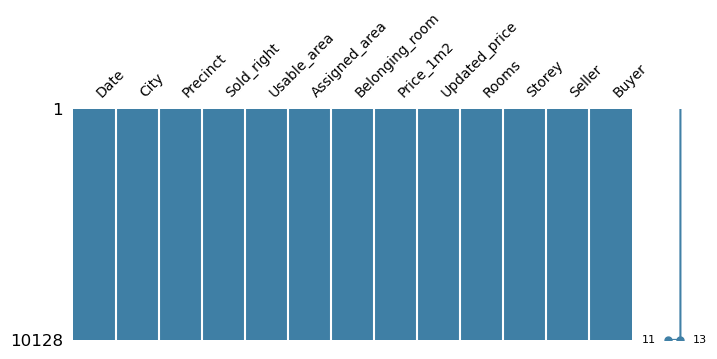

In [30]:
df.isnull().sum()
msno.matrix(df, figsize=(8,3), color=(0.25,0.5,0.65), fontsize=10);

In [31]:
df.isnull().sum()

Date              0
City              0
Precinct          0
Sold_right        0
Usable_area       0
Assigned_area     0
Belonging_room    0
Price_1m2         3
Updated_price     3
Rooms             0
Storey            0
Seller            0
Buyer             0
dtype: int64

In [32]:
# Display rows with missing values
df[df.isnull().any(axis=1)]

Date    City   Precinct         Sold_right  Usable_area  \
10165  2020-05-08  Gdańsk   Kokoszki  własność-własność        42.92   
10166  2020-05-11  Gdańsk   Kokoszki  własność-własność        47.78   
10167  2020-05-11  Gdańsk   Kokoszki  własność-własność        57.19   

       Assigned_area      Belonging_room  Price_1m2  Updated_price  \
10165           3.18  komórka lokatorska        NaN            NaN   
10166           3.16  komórka lokatorska        NaN            NaN   
10167           4.08  komórka lokatorska        NaN            NaN   

                                                   Rooms  Storey     Seller  \
10165  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     2.0  deweloper   
10166  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     2.0  deweloper   
10167  pokój:2,pokój z aneksem kuchennym:1,łazienka z...     4.0  deweloper   

                Buyer  
10165  osoba fizyczna  
10166  osoba fizyczna  
10167  osoba fizyczna

In [33]:
# Delete the missing values
df.dropna(inplace=True)

In [34]:
# Check missing values again
df.isnull().sum()

Date              0
City              0
Precinct          0
Sold_right        0
Usable_area       0
Assigned_area     0
Belonging_room    0
Price_1m2         0
Updated_price     0
Rooms             0
Storey            0
Seller            0
Buyer             0
dtype: int64

In [35]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10125 entries, 0 to 10164
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date            10125 non-null  object  
 1   City            10125 non-null  category
 2   Precinct        10125 non-null  category
 3   Sold_right      10125 non-null  category
 4   Usable_area     10125 non-null  float64 
 5   Assigned_area   10125 non-null  float64 
 6   Belonging_room  10125 non-null  category
 7   Price_1m2       10125 non-null  float64 
 8   Updated_price   10125 non-null  float64 
 9   Rooms           10125 non-null  category
 10  Storey          10125 non-null  float64 
 11  Seller          10125 non-null  category
 12  Buyer           10125 non-null  category
dtypes: category(7), float64(5), object(1)
memory usage: 1.4 MB


## Price for 1 square meter - label data

In [36]:
df['Price_1m2'].describe()

count    10125.000000
mean      8928.871433
std       3204.260722
min         80.480000
25%       6941.630000
50%       8280.250000
75%      10017.810000
max      51000.230000
Name: Price_1m2, dtype: float64

In [37]:
df['Price_1m2'].nlargest(10)

10164    51000.23
10163    44474.25
10162    37890.94
10161    37589.50
10160    35472.97
10159    34687.81
10158    32932.37
10156    32644.50
10155    32284.73
10154    32122.02
Name: Price_1m2, dtype: float64

In [38]:
# Check the data with highest price
df.loc[[10164]]

Date   City Precinct         Sold_right  Usable_area  \
10164  2021-01-20  Sopot    Sopot  własność-własność        43.29   

       Assigned_area      Belonging_room  Price_1m2  Updated_price  \
10164          13.32  komórka lokatorska   51000.23      2207800.0   

                                                Rooms  Storey          Seller  \
10164  pokój:2,kuchnia:1,łazienka:1,wc:1,przedpokój:1     1.0  osoba fizyczna   

                        Buyer  
10164  przeds., spółka, firma

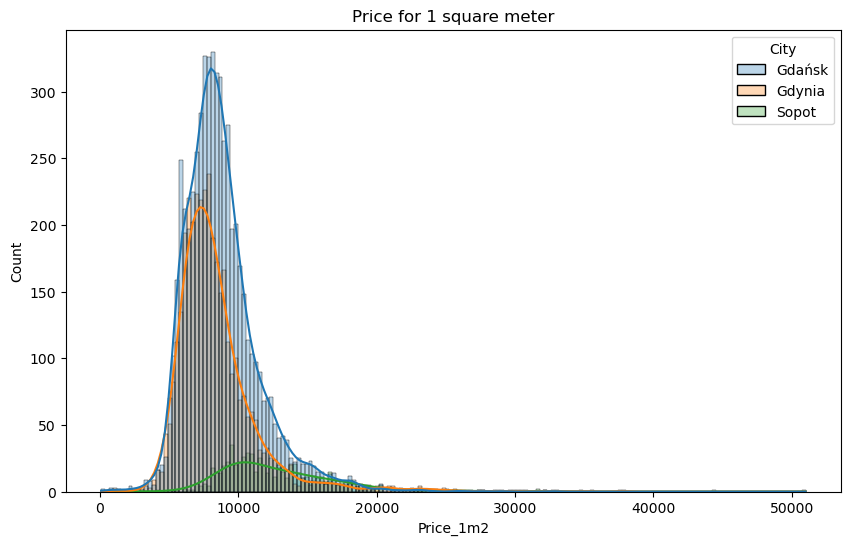

In [39]:
# Histogram
fig = plt.figure(figsize=(10,6))
sns.histplot(x='Price_1m2', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Price for 1 square meter');

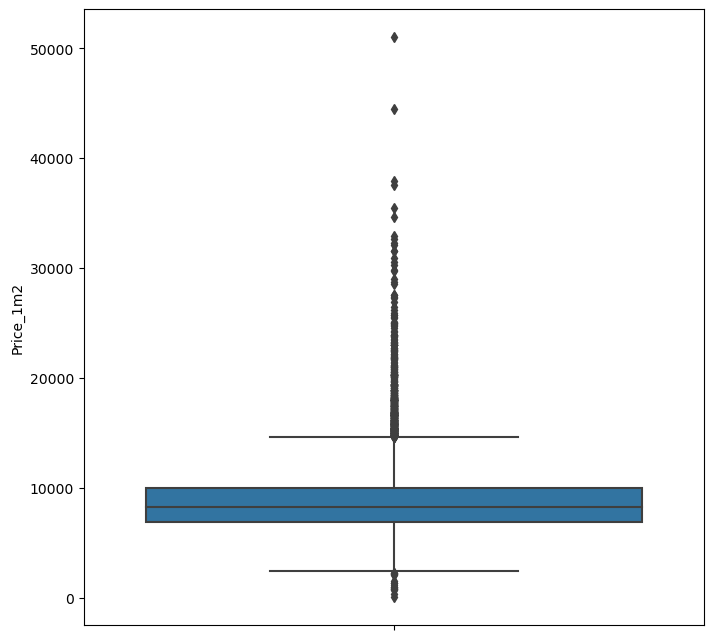

In [40]:
# Check for the outliers
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=df, y='Price_1m2');

In [41]:
# Remove outliers with the 'remove_outlier' function
df = remove_outlier(df,'Price_1m2', 0.15, 0.85)

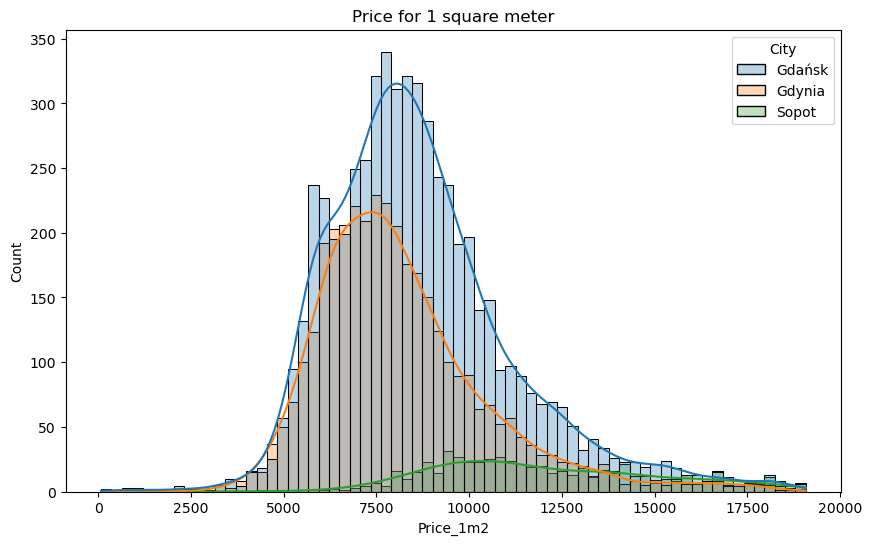

In [43]:
# Histogram again
fig = plt.figure(figsize=(10,6))
sns.histplot(x='Price_1m2', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Price for 1 square meter');

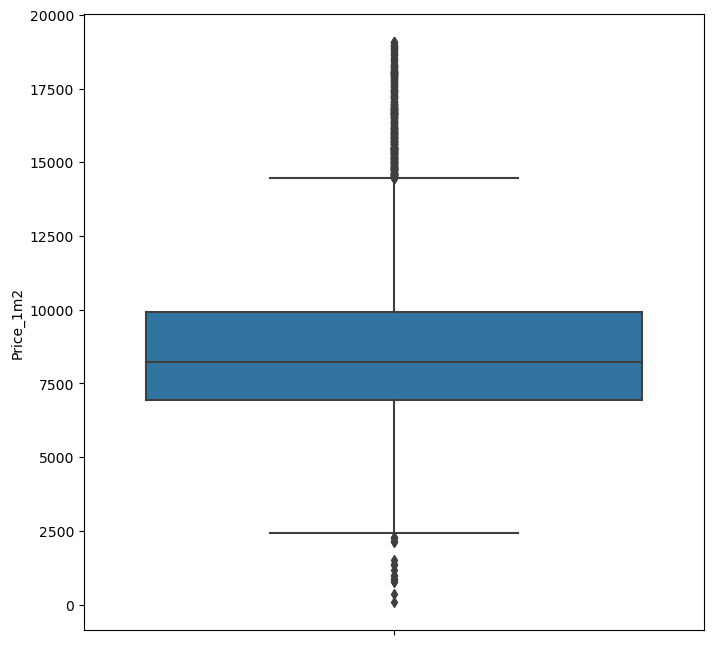

In [44]:
# Check for the outliers again
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=df, y='Price_1m2');

## Transaction date

In [45]:
df['Date'].describe()

count           9987
unique           422
top       2020-09-28
freq              68
Name: Date, dtype: object

In [46]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [47]:
df['Year'] = df['Date'].dt.year

In [48]:
df['Month'] = df['Date'].dt.month

In [49]:
df['Day'] = df['Date'].dt.day

In [50]:
df = df.drop(['Date'], axis=1)

In [51]:
df.head()

City            Precinct              Sold_right  Usable_area  \
0  Gdańsk             Klukowo       własność-własność       3539.0   
1  Gdańsk   Przymorze Wielkie       własność-własność         70.1   
2  Gdańsk            Szadółki       własność-własność         40.0   
3  Gdańsk               Oliwa  spółdzielcze wł. prawo         28.4   
4   Sopot               Sopot       własność-własność         86.0   

   Assigned_area      Belonging_room  Price_1m2  Updated_price  \
0           3.60  komórka lokatorska      80.48      284818.41   
1           3.80  komórka lokatorska     356.63       25000.00   
2           4.15  komórka lokatorska     773.46       30938.50   
3         999.00                brak     845.07       24000.00   
4           5.90  komórka lokatorska     854.65       73500.00   

                                               Rooms  Storey  \
0  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     2.0   
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
3                  pokój:1,kuchnia:1,łazienka z wc:1     6.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   

                    Seller                    Buyer  Year  Month  Day  
0                deweloper           osoba fizyczna  2021      5   31  
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7  
2                deweloper           osoba fizyczna  2020     10   29  
3           osoba fizyczna           osoba fizyczna  2020      9   23  
4           osoba fizyczna           osoba fizyczna  2020      6    8

## Cities
* Gdańsk
* Gdynia
* Sopot

In [52]:
df['City'].describe()

count       9987
unique         3
top       Gdańsk
freq        5771
Name: City, dtype: object

Gdańsk    5771
Gdynia    3599
Sopot      617
Name: City, dtype: int64


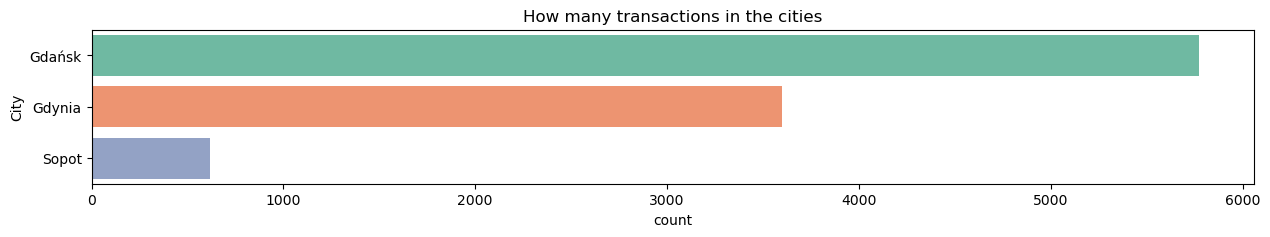

In [53]:
# How many transactions are there in the particular cities
fig = plt.figure(figsize=(15,2));
sns.countplot(y='City', data=df,saturation = 0.80, palette = "Set2").set(title="How many transactions in the cities");
print(df.City.value_counts());

## Precinct  (Urban area)

In [54]:
df['Precinct'].describe()

count           9987
unique            80
top        Łostowice
freq             653
Name: Precinct, dtype: object

In [55]:
# Check the groups of the data
df_group_precinct = df.groupby('Precinct')

In [56]:
df_group_precinct.ngroups

80

In [57]:
df_group_precinct.size()

Precinct
 Aniołki                         31
 Babie Doły                      13
 Biskupia Górka                   6
 Brzeźno                        148
 Brętowo                         41
 Bysewo                           2
 Chełm                          222
 Chwarzno - Wiczlino            313
 Chylonia                       368
 Cisowa                         154
 Dolne Miasto                    41
 Działki Leśne                  123
 Dąbrowa                        196
 Długie Ogrody                  172
 Firoga                          12
 Grabówek                       135
 Główne Miasto                   79
 Jasień                         256
 Jelitkowo                       28
 Kamienna Góra                   64
 Karwiny                        144
 Kiełpinek                       54
 Kiełpino Górne                   1
 Klukowo                         18
 Kokoszki                        47
 Krakowiec                        1
 Leszczynki                      94
 Letnica           

In [58]:
df_group_precinct[["City"]].describe()

City                    
                             count unique     top freq
Precinct                                              
 Aniołki                        31      1  Gdańsk   31
 Babie Doły                     13      1  Gdynia   13
 Biskupia Górka                  6      1  Gdańsk    6
 Brzeźno                       148      1  Gdańsk  148
 Brętowo                        41      1  Gdańsk   41
 Bysewo                          2      1  Gdańsk    2
 Chełm                         222      1  Gdańsk  222
 Chwarzno - Wiczlino           313      1  Gdynia  313
 Chylonia                      368      1  Gdynia  368
 Cisowa                        154      1  Gdynia  154
 Dolne Miasto                   41      1  Gdańsk   41
 Działki Leśne                 123      1  Gdynia  123
 Dąbrowa                       196      1  Gdynia  196
 Długie Ogrody                 172      1  Gdańsk  172
 Firoga                         12      1  Gdańsk   12
 Grabówek                      135      1  Gdynia  135
 Główne Miasto                  79      1  Gdańsk   79
 Jasień                        256      1  Gdańsk  256
 Jelitkowo                      28      1  Gdańsk   28
 Kamienna Góra                  64      1  Gdynia   64
 Karwiny                       144      1  Gdynia  144
 Kiełpinek                      54      1  Gdańsk   54
 Kiełpino Górne                  1      1  Gdańsk    1
 Klukowo                        18      1  Gdańsk   18
 Kokoszki                       47      1  Gdańsk   47
 Krakowiec                       1      1  Gdańsk    1
 Leszczynki                     94      1  Gdynia   94
 Letnica                        90      1  Gdańsk   90
 Matarnia                        2      1  Gdańsk    2
 Maćkowy                       140      1  Gdańsk  140
 Mały Kack                     222      1  Gdynia  222
 Młode Miasto                   42      1  Gdańsk   42
 Młyniska                       20      1  Gdańsk   20
 Niedźwiednik                   42      1  Gdańsk   42
 Nowe Ogrody                     8      1  Gdańsk    8
 Nowy Port                      60      1  Gdańsk   60
 Obłuże                        193      1  Gdynia  193
 Oksywie                       166      1  Gdynia  166
 Oliwa                         269      1  Gdańsk  269
 Olszynka                        9      1  Gdańsk    9
 Orunia                         82      1  Gdańsk   82
 Orunia Górna                   71      1  Gdańsk   71
 Orłowo                        110      1  Gdynia  110
 Osowa                         118      1  Gdańsk  118
 Piecki Migowo                 434      1  Gdańsk  434
 Pogórze                       113      1  Gdynia  113
 Przeróbka                      37      1  Gdańsk   37
 Przymorze Małe                184      1  Gdańsk  184
 Przymorze Wielkie             474      1  Gdańsk  474
 Pustki Cisowskie - Demptowo    91      1  Gdynia   91
 Redłowo                       182      1  Gdynia  182
 Rudniki                         2      1  Gdańsk    2
 Siedlce                       117      1  Gdańsk  117
 Smęgorzyno                      1      1  Gdańsk    1
 Sobieszewo                      3      1  Gdańsk    3
 Sopot                         617      1   Sopot  617
 Spichlerze                     88      1  Gdańsk   88
 Stare Miasto                   46      1  Gdańsk   46
 Stare Przedmieście             43      1  Gdańsk   43
 Stogi                         115      1  Gdańsk  115
 Strzyża                        47      1  Gdańsk   47
 Suchanino                      53      1  Gdańsk   53
 Szadółki                      227      1  Gdańsk  227
 Ujeścisko                     121      1  Gdańsk  121
 VII Dwór                       24      1  Gdańsk   24
 Wielki Kack                   163      1  Gdynia  163
 Witomino                        2      1  Gdynia    2
 Witomino Leśniczówka          103      1  Gdynia  103
 Witomino Radiostacja          136      1  Gdynia  136
 Wrzeszcz                      525      1  Gdańsk  525
 Wyspa Sobiesze

In [53]:
df['Precinct'].head()

0               Klukowo
1     Przymorze Wielkie
2              Szadółki
3                 Oliwa
4                 Sopot
Name: Precinct, dtype: category
Categories (80, object): [' Aniołki', ' Babie Doły', ' Biskupia Górka', ' Brzeźno', ..., ' Łostowice', ' Śródmieście z Portem', ' Św. Wojciech - Lipce', ' Żabianka']

In [59]:
# Urban areas dictionary - to group the precints
myDict = {}
for key in [' Brętowo', ' Jelitkowo', ' Oliwa', ' Przymorze Małe', ' Przymorze Wielkie', ' VII Dwór', ' Żabianka']:
    myDict[key] = 'Gdansk_Oliwa'
for key in [' Krakowiec', ' Letnica', ' Młyniska', ' Nowy Port', ' Przeróbka', ' Rudniki', ' Sobieszewo', ' Stogi', ' Wyspa Sobieszewska']:
    myDict[key] = 'Gdansk_Port'
for key in [' Chełm', ' Jasień', ' Kiełpinek', ' Kiełpino Górne', ' Orunia Górna', ' Szadółki', ' Ujeścisko', ' Zabornia', ' Łostowice']:
    myDict[key] = 'Gdansk_Poludnie'
for key in [' Biskupia Górka', ' Dolne Miasto', ' Długie Ogrody', ' Główne Miasto', ' Młode Miasto', ' Nowe Ogrody', ' Olszynka', ' Orunia', ' Siedlce', ' Spichlerze', ' Stare Miasto', ' Stare Przedmieście', ' Suchanino', ' Św. Wojciech - Lipce']:
    myDict[key] = 'Gdansk_Srodmiescie'
for key in [' Aniołki', ' Brzeźno', ' Niedźwiednik', ' Piecki Migowo', ' Strzyża', ' Wrzeszcz', ' Zaspa Młyniec', ' Zaspa Rozstaje']:
    myDict[key] = 'Gdansk_Wrzeszcz'
for key in [' Bysewo', ' Firoga', ' Klukowo', ' Kokoszki', ' Matarnia', ' Maćkowy', ' Osowa', ' Smęgorzyno', ' Złota Karczma']:
    myDict[key] = 'Gdansk_Zachod'
for key in [' Babie Doły', ' Obłuże', ' Oksywie', ' Pogórze']:
    myDict[key] = 'Gdynia_Port'
for key in [' Chylonia', ' Cisowa', ' Grabówek', ' Leszczynki', ' Pustki Cisowskie - Demptowo']:
    myDict[key] = 'Gdynia_Polnoc'
for key in [' Chwarzno - Wiczlino', ' Dąbrowa', ' Wielki Kack']:
    myDict[key] = 'Gdynia_Zachod'
for key in [' Działki Leśne', ' Karwiny', ' Mały Kack', ' Witomino', ' Witomino Leśniczówka', ' Witomino Radiostacja']:
    myDict[key] = 'Gdynia_Centrum'
for key in [' Kamienna Góra', ' Orłowo', ' Redłowo', ' Wzgórze Św. Maksymiliana', ' Śródmieście z Portem']:
    myDict[key] = 'Gdynia_Przymorze'
for key in [' Sopot']:
    myDict[key] = 'Sopot' 

In [60]:
df['Precinct'].replace(myDict, inplace = True)

In [61]:
# Change the column name
df.rename(columns = {'Precinct':'Urban_area' }, inplace = True)

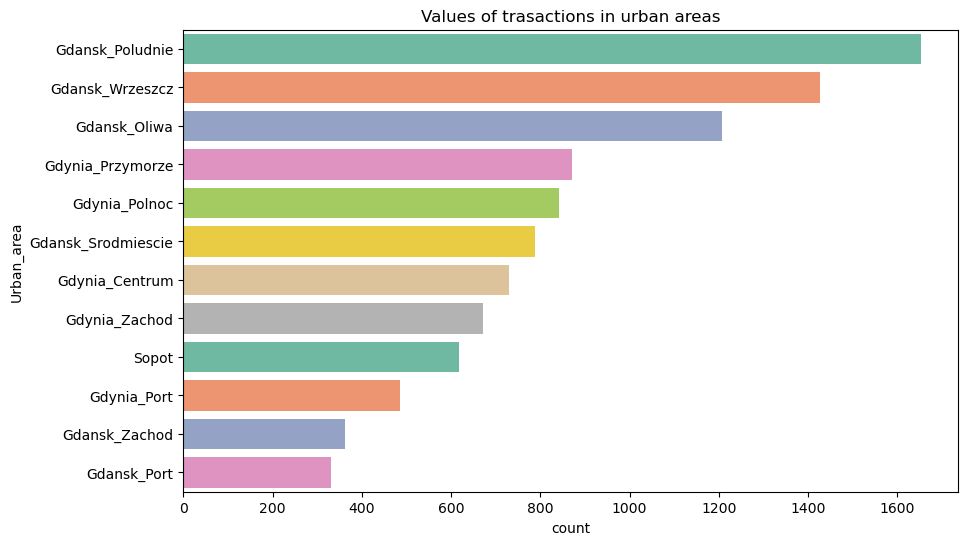

In [63]:
# Values of transatcions in different urban areas.
fig = plt.figure(figsize=(10,6));
sns.countplot(y='Urban_area',
              order = df['Urban_area'].value_counts().index,
              data=df.sort_values(by='Urban_area', ascending=True),
              saturation = 0.80, 
              palette = "Set2", hue_order='City').set(title="Values of trasactions in urban areas");

In [64]:
df.head()

City       Urban_area              Sold_right  Usable_area  \
0  Gdańsk    Gdansk_Zachod       własność-własność       3539.0   
1  Gdańsk     Gdansk_Oliwa       własność-własność         70.1   
2  Gdańsk  Gdansk_Poludnie       własność-własność         40.0   
3  Gdańsk     Gdansk_Oliwa  spółdzielcze wł. prawo         28.4   
4   Sopot            Sopot       własność-własność         86.0   

   Assigned_area      Belonging_room  Price_1m2  Updated_price  \
0           3.60  komórka lokatorska      80.48      284818.41   
1           3.80  komórka lokatorska     356.63       25000.00   
2           4.15  komórka lokatorska     773.46       30938.50   
3         999.00                brak     845.07       24000.00   
4           5.90  komórka lokatorska     854.65       73500.00   

                                               Rooms  Storey  \
0  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     2.0   
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
3                  pokój:1,kuchnia:1,łazienka z wc:1     6.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   

                    Seller                    Buyer  Year  Month  Day  
0                deweloper           osoba fizyczna  2021      5   31  
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7  
2                deweloper           osoba fizyczna  2020     10   29  
3           osoba fizyczna           osoba fizyczna  2020      9   23  
4           osoba fizyczna           osoba fizyczna  2020      6    8

In [65]:
df['Urban_area'].value_counts()

Gdansk_Poludnie       1654
Gdansk_Wrzeszcz       1427
Gdansk_Oliwa          1207
Gdynia_Przymorze       870
Gdynia_Polnoc          842
Gdansk_Srodmiescie     788
Gdynia_Centrum         730
Gdynia_Zachod          672
Sopot                  617
Gdynia_Port            485
Gdansk_Zachod          363
Gdansk_Port            332
Name: Urban_area, dtype: int64

## Sold  right
Type of rights assigned to the property.

In [66]:
df['Sold_right'].describe()

count                  9987
unique                    5
top       własność-własność
freq                   8513
Name: Sold_right, dtype: object

In [67]:
df['Sold_right'].value_counts()

własność-własność                8513
spółdzielcze wł. prawo           1425
własność-u.wieczyste               40
udział ze wskazaniem na lokal       7
nie podano                          2
Name: Sold_right, dtype: int64

własność-własność                8513
spółdzielcze wł. prawo           1425
własność-u.wieczyste               40
udział ze wskazaniem na lokal       7
nie podano                          2
Name: Sold_right, dtype: int64


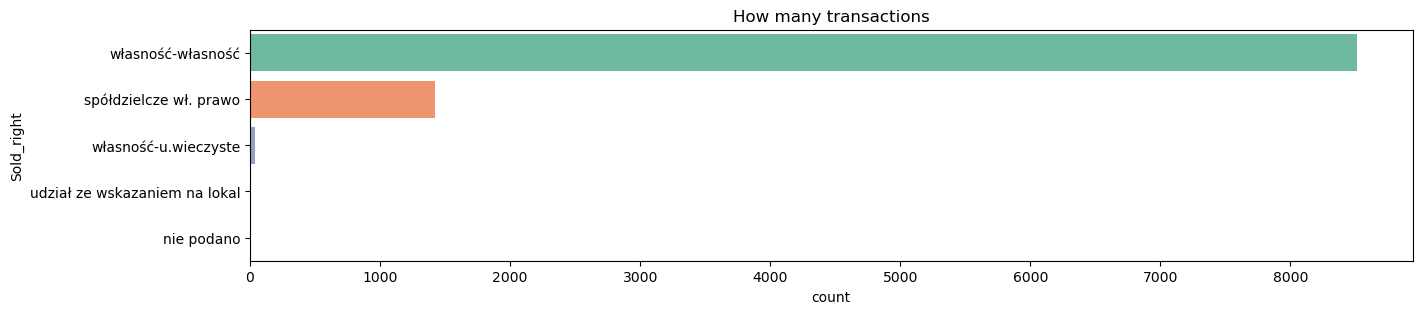

In [68]:
# How many transatctions for the properties with different rights assigned
fig = plt.figure(figsize=(15,3));
sns.countplot(y='Sold_right',
              order = df['Sold_right'].value_counts().index,
              data=df,saturation = 0.80, 
              palette = "Set2").set(title="How many transactions");
print(df.Sold_right.value_counts());

In [70]:
# Let's check the rows with no informations about assigned rights
df.loc[df['Sold_right'] == 'nie podano']

City       Urban_area  Sold_right  Usable_area  Assigned_area  \
2965  Gdańsk  Gdansk_Poludnie  nie podano        61.27            1.0   
5326  Gdańsk  Gdansk_Wrzeszcz  nie podano        52.30            1.0   

     Belonging_room  Price_1m2  Updated_price  \
2965           brak    7181.33       440000.0   
5326           brak    8413.00       440000.0   

                                  Rooms  Storey          Seller  \
2965  pokój:3,kuchnia:1,łazienka z wc:1     4.0  osoba fizyczna   
5326  pokój:3,kuchnia:1,łazienka z wc:1     7.0  osoba fizyczna   

               Buyer  Year  Month  Day  
2965  osoba fizyczna  2021      2    1  
5326  osoba fizyczna  2021      4   26

In [71]:
# Delete the rows without assigned rights information
df.drop([2965, 5326], inplace=True)

In [72]:
df.loc[df['Sold_right'] == 'nie podano']

Empty DataFrame
Columns: [City, Urban_area, Sold_right, Usable_area, Assigned_area, Belonging_room, Price_1m2, Updated_price, Rooms, Storey, Seller, Buyer, Year, Month, Day]
Index: []

własność-własność                8513
spółdzielcze wł. prawo           1425
własność-u.wieczyste               40
udział ze wskazaniem na lokal       7
nie podano                          0
Name: Sold_right, dtype: int64


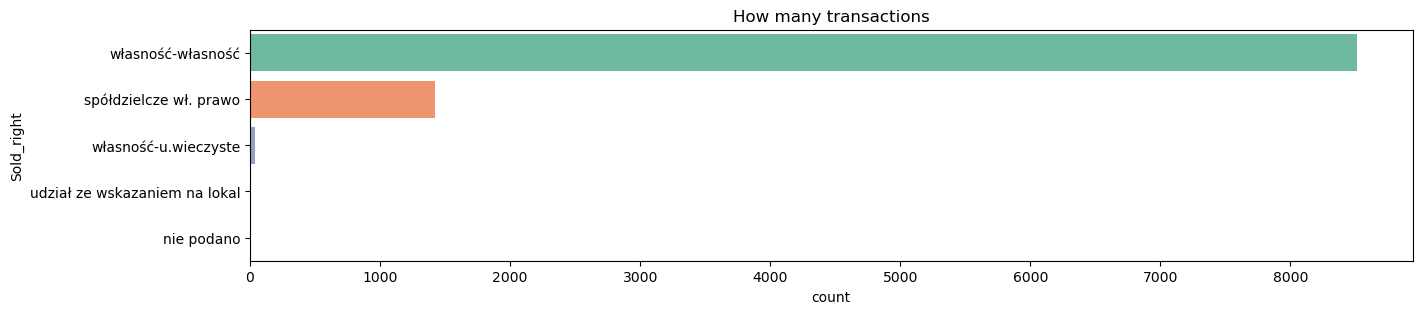

In [73]:
# Let's check assigned rights again
fig = plt.figure(figsize=(15,3));
sns.countplot(y='Sold_right',
              order = df['Sold_right'].value_counts().index,
              data=df,saturation = 0.80, 
              palette = "Set2").set(title="How many transactions");
print(df.Sold_right.value_counts());

## Usable area

In [74]:
df['Usable_area'].describe()

count    9985.000000
mean       54.708155
std        41.355436
min        20.140000
25%        40.910000
50%        49.580000
75%        63.000000
max      3539.000000
Name: Usable_area, dtype: float64

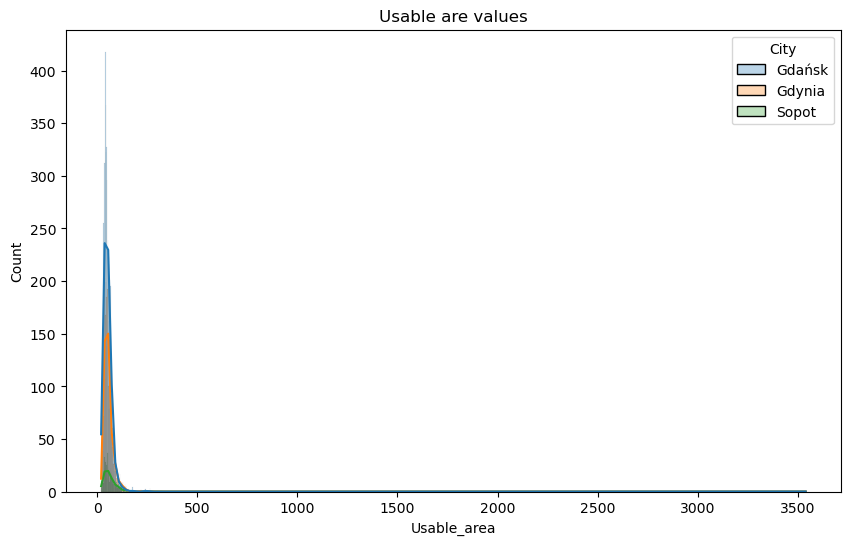

In [75]:
# Histogram
fig = plt.figure(figsize=(10,6));
sns.histplot(x='Usable_area', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Usable are values');

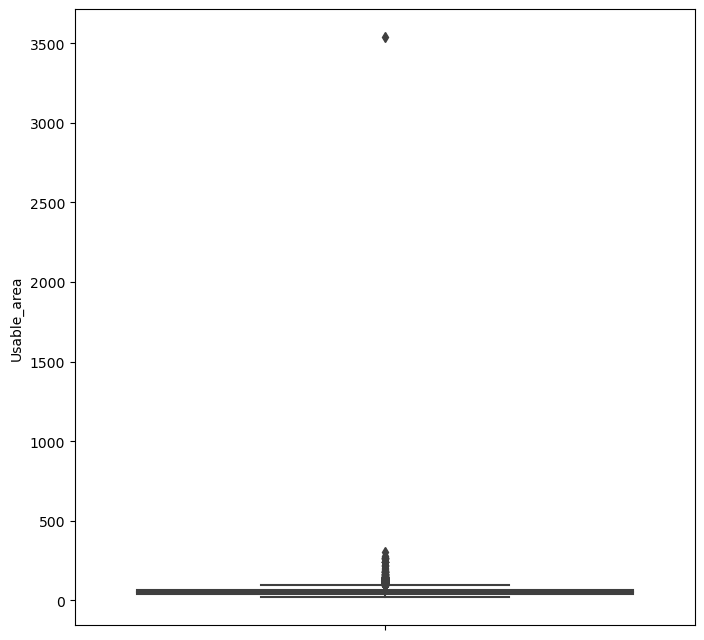

In [76]:
# Outliers
fig = plt.figure(figsize=(8,8));
sns.boxplot(data=df, y='Usable_area');

In [77]:
# Time to delete some outliers
df = remove_outlier(df,'Usable_area', 0.15, 0.85)

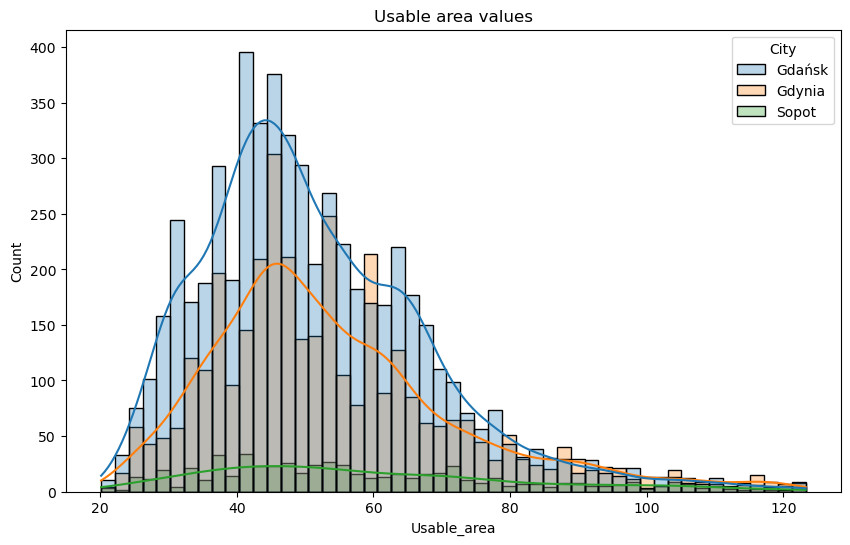

In [78]:
# Histogram after removing outliers
fig = plt.figure(figsize=(10,6));
sns.histplot(x='Usable_area', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Usable area values');

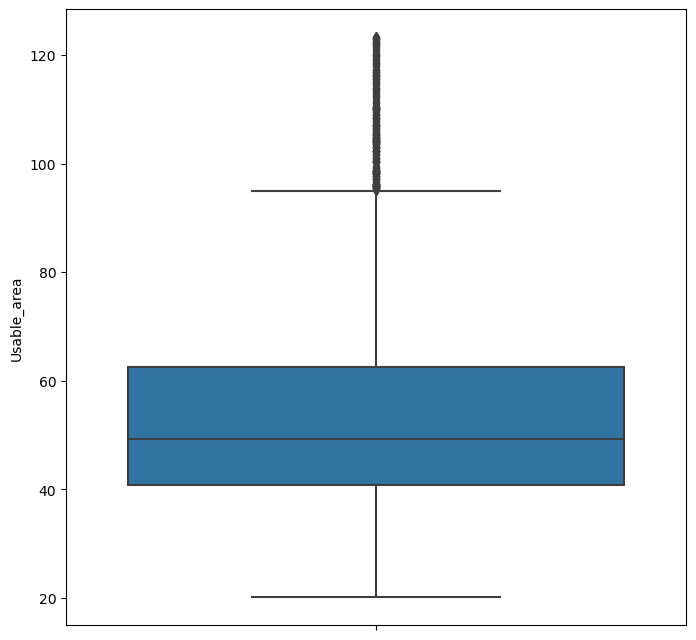

In [79]:
# Outliers
fig = plt.figure(figsize=(8,8));
sns.boxplot(data=df, y='Usable_area');

In [80]:
df['Usable_area'].describe()

count    9847.000000
mean       52.908310
std        17.954086
min        20.140000
25%        40.840000
50%        49.300000
75%        62.540000
max       123.280000
Name: Usable_area, dtype: float64

## Assigned area
Area of the room belonging to the premises.

In [81]:
df['Assigned_area'].describe()

count    9847.000000
mean       26.856966
std       181.330977
min         0.000000
25%         0.000000
50%         1.000000
75%         3.400000
max      9999.000000
Name: Assigned_area, dtype: float64

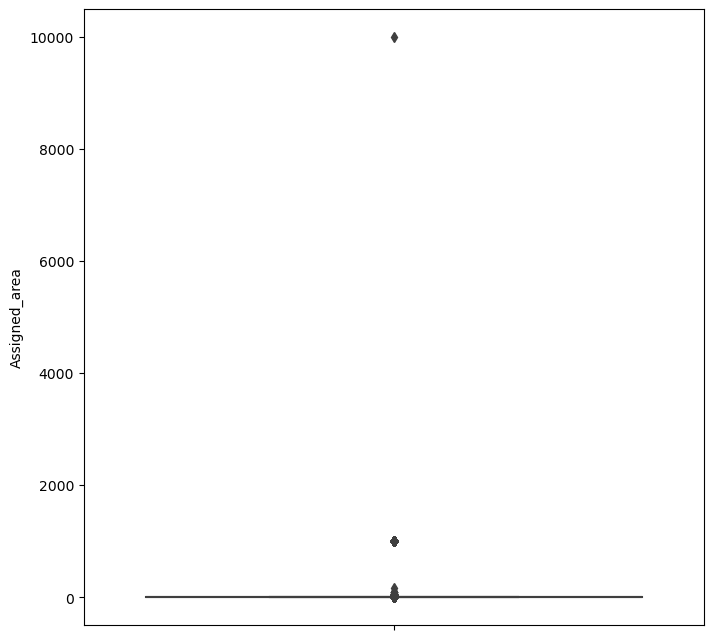

In [82]:
# Outliers
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=df, y='Assigned_area');

In [83]:
df.head()

City       Urban_area              Sold_right  Usable_area  \
1  Gdańsk     Gdansk_Oliwa       własność-własność         70.1   
2  Gdańsk  Gdansk_Poludnie       własność-własność         40.0   
3  Gdańsk     Gdansk_Oliwa  spółdzielcze wł. prawo         28.4   
4   Sopot            Sopot       własność-własność         86.0   
5  Gdańsk     Gdansk_Oliwa       własność-własność         46.0   

   Assigned_area      Belonging_room  Price_1m2  Updated_price  \
1           3.80  komórka lokatorska     356.63        25000.0   
2           4.15  komórka lokatorska     773.46        30938.5   
3         999.00                brak     845.07        24000.0   
4           5.90  komórka lokatorska     854.65        73500.0   
5           0.00                brak     869.57        40000.0   

                                               Rooms  Storey  \
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
3                  pokój:1,kuchnia:1,łazienka z wc:1     6.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   
5          pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0   

                    Seller                    Buyer  Year  Month  Day  
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7  
2                deweloper           osoba fizyczna  2020     10   29  
3           osoba fizyczna           osoba fizyczna  2020      9   23  
4           osoba fizyczna           osoba fizyczna  2020      6    8  
5           osoba fizyczna           osoba fizyczna  2021      6   23

In [215]:
# Let's check if there is assigned area information for no belonging room :/.
df.loc[df['Belonging_room'] == 'brak'].head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
5   Gdańsk      Gdansk_Oliwa  własność-własność        46.00            0.0   
8   Gdynia  Gdynia_Przymorze  własność-własność        35.70            0.0   
9   Gdańsk   Gdansk_Wrzeszcz  własność-własność        87.91            0.0   
11  Gdańsk   Gdansk_Wrzeszcz  własność-własność        33.19            0.0   
14  Gdańsk   Gdansk_Wrzeszcz  własność-własność        74.10            0.0   

    Price_1m2  Updated_price  \
5      869.57        40000.0   
8     1170.25        41778.0   
9     1330.91       117000.0   
11    1506.48        50000.0   
14    2159.24       160000.0   

                                                Rooms  Storey          Seller  \
5           pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0  osoba fizyczna   
8           pokój:2,kuchnia:1,łazienka:1,przedpokój:1     1.0   Skarb Państwa   
9   pokój:3,pokój z aneksem kuchennym:1,łazienka:2...     2.0  osoba fizyczna   
11          pokój:1,kuchnia:1,łazienka:1,przedpokój:1     4.0  osoba fizyczna   
14  pokój:2,kuchnia:1,łazienka:1,przedpokój:1,spiż...     3.0  osoba fizyczna   

             Buyer  Year  Month  Day Belonging_room  Rooms_sum Storey_cat  
5   osoba fizyczna  2021      6   23           brak          5       good  
8   osoba fizyczna  2021      6   15           brak          5  very_good  
9   osoba fizyczna  2021      4   15           brak          7       good  
11  osoba fizyczna  2020      7    2           brak          4       good  
14  osoba fizyczna  2021      3   30           brak          6       good

In [87]:
# Let's chcek some rows
df.loc[df['Assigned_area'] == 9999]

City Urban_area         Sold_right  Usable_area  Assigned_area  \
8797  Sopot      Sopot  własność-własność         65.0         9999.0   

     Belonging_room  Price_1m2  Updated_price  \
8797           brak   11692.31       760000.0   

                                               Rooms  Storey          Seller  \
8797  pokój:3,kuchnia:1,łazienka z wc:1,przedpokój:1     2.0  osoba fizyczna   

               Buyer  Year  Month  Day  
8797  osoba fizyczna  2020      5    6

In [214]:
df.loc[df['Assigned_area'] == 999].head()

Empty DataFrame
Columns: [City, Urban_area, Sold_right, Usable_area, Assigned_area, Price_1m2, Updated_price, Rooms, Storey, Seller, Buyer, Year, Month, Day, Belonging_room, Rooms_sum, Storey_cat]
Index: []

In [213]:
df['Assigned_area'].value_counts().head()

0.0    5089
2.0      68
3.0      62
2.7      48
3.3      48
Name: Assigned_area, dtype: int64

In [90]:
# Remove outliers
df = remove_outlier(df,'Assigned_area', 0.15, 0.85)

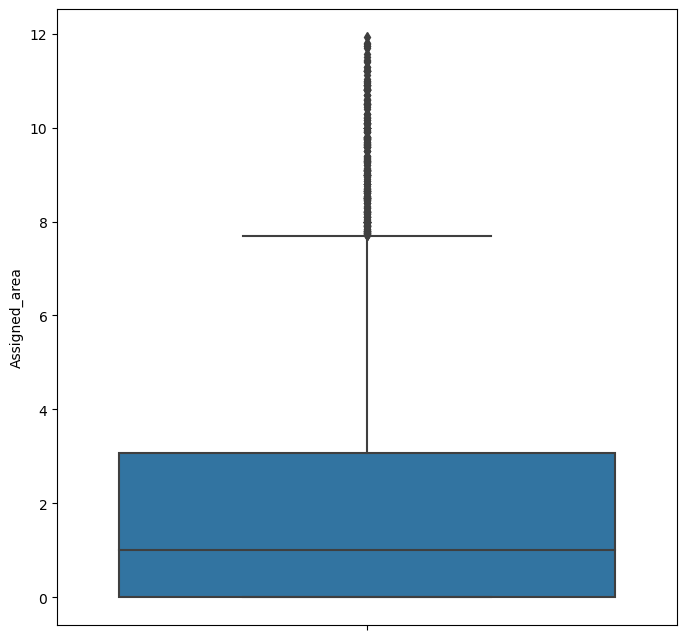

In [91]:
# Check the outliers
fig = plt.figure(figsize=(8,8))
sns.boxplot(data=df, y='Assigned_area');

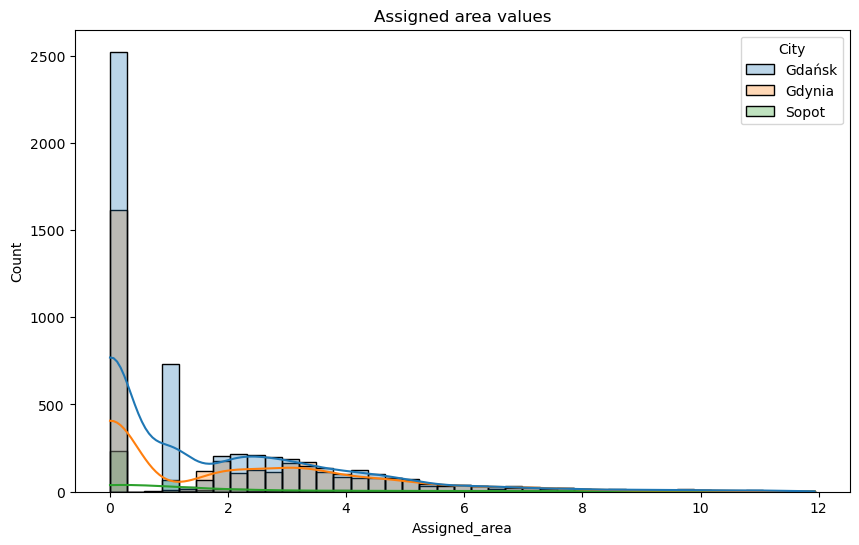

In [92]:
# Histogram
fig = plt.figure(figsize=(10,6))
sns.histplot(x='Assigned_area', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Assigned area values');

In [212]:
df['Assigned_area'].value_counts().head()

0.0    5089
2.0      68
3.0      62
2.7      48
3.3      48
Name: Assigned_area, dtype: int64

In [94]:
df['Assigned_area'].min()

0.0

In [95]:
df['Assigned_area'].max()

11.93

In [96]:
# Change value 1 to 0 because it looks like obvious mistake
df['Assigned_area'] = df['Assigned_area'].apply(lambda x: 0 if x <= 1.00 else x)

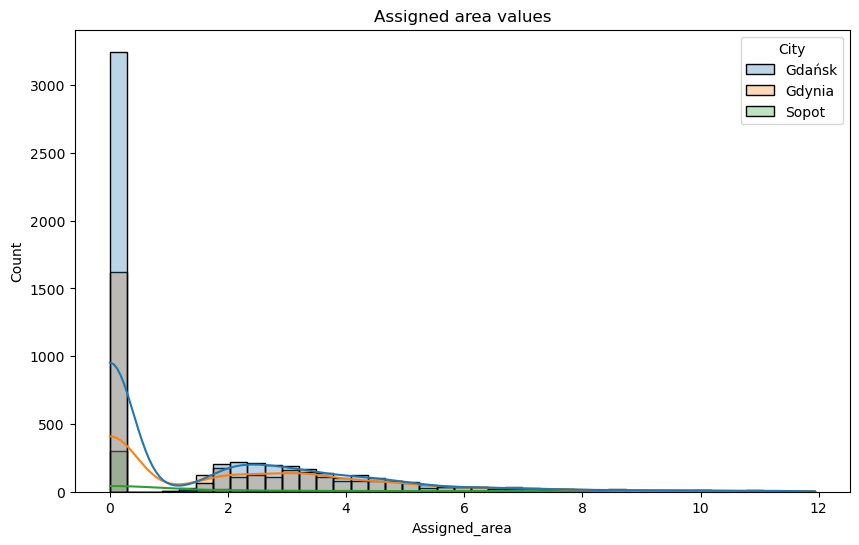

In [98]:
# Final histogram
fig = plt.figure(figsize=(10,6))
sns.histplot(x='Assigned_area', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Assigned area values');

## Belonging room

In [100]:
# Let's check how many types of belonging rooms are there
df['Belonging_room'].value_counts()

brak                                     3854
piwnica                                  2311
komórka lokatorska                       1677
nie podano                                950
miejsce postojowe                         148
BRAK, komórka lokatorska                  113
komórka lokatorska, MIEJSCE POSTOJOWE     102
KOMÓRKA LOKATORSKA, miejsce postojowe      90
MIEJSCE POSTOJOWE, piwnica                 29
brak, PIWNICA                              18
miejsce postojowe, PIWNICA                  6
garaż                                       6
BRAK, piwnica                               5
GARAŻ, piwnica                              5
komórka lokatorska, PIWNICA                 4
strych                                      4
PIWNICA, strych                             4
BRAK, nie podano                            1
brak, MIEJSCE POSTOJOWE                     1
komórka lokatorska, NIE PODANO              1
komórka lokatorska, STRYCH                  1
KOMÓRKA LOKATORSKA, strych        

In [101]:
df['Belonging_room'] = df['Belonging_room'].str.lower()

In [102]:
df['Belonging_room'].value_counts()

brak                                     3854
piwnica                                  2311
komórka lokatorska                       1677
nie podano                                950
komórka lokatorska, miejsce postojowe     192
miejsce postojowe                         148
brak, komórka lokatorska                  113
miejsce postojowe, piwnica                 35
brak, piwnica                              23
garaż                                       6
komórka lokatorska, piwnica                 5
garaż, piwnica                              5
piwnica, strych                             4
strych                                      4
garaż, komórka lokatorska                   2
komórka lokatorska, strych                  2
miejsce postojowe, strych                   1
brak, nie podano                            1
brak, miejsce postojowe                     1
komórka lokatorska, nie podano              1
Name: Belonging_room, dtype: int64

In [103]:
# Let's correct some obvious mistakes
df.loc[df['Belonging_room'] == 'komórka lokatorska, nie podano']

City       Urban_area         Sold_right  Usable_area  Assigned_area  \
9730  Gdańsk  Gdansk_Wrzeszcz  własność-własność         97.1           4.02   

                      Belonging_room  Price_1m2  Updated_price  \
9730  komórka lokatorska, nie podano   15447.99      1500000.0   

                                                  Rooms  Storey  \
9730  pokój:3,pokój z aneksem kuchennym:1,łazienka:2...     1.0   

              Seller           Buyer  Year  Month  Day  
9730  osoba fizyczna  osoba fizyczna  2020     11   24

In [104]:
df.at[9730, 'Belonging_room'] = 'komórka lokatorska'

In [105]:
df.loc[df['Belonging_room'] == 'brak, miejsce postojowe']

City          Urban_area         Sold_right  Usable_area  \
9527  Gdańsk  Gdansk_Srodmiescie  własność-własność         42.7   

      Assigned_area           Belonging_room  Price_1m2  Updated_price  \
9527            0.0  brak, miejsce postojowe   14051.52       600000.0   

                                                  Rooms  Storey  \
9527  pokój:1,pokój z aneksem kuchennym:1,łazienka:1...     1.0   

              Seller           Buyer  Year  Month  Day  
9527  osoba fizyczna  osoba fizyczna  2021      3   23

In [106]:
df.at[9527, 'Belonging_room'] = 'brak'

In [107]:
df.loc[df['Belonging_room'] == 'brak, nie podano']

City       Urban_area         Sold_right  Usable_area  Assigned_area  \
3695  Gdańsk  Gdansk_Wrzeszcz  własność-własność        31.95            0.0   

        Belonging_room  Price_1m2  Updated_price  \
3695  brak, nie podano    7574.33       242000.0   

                                          Rooms  Storey          Seller  \
3695  pokój:1,kuchnia:1,łazienka:1,przedpokój:1     2.0  osoba fizyczna   

               Buyer  Year  Month  Day  
3695  osoba fizyczna  2020      9   11

In [108]:
df.at[3695, 'Belonging_room'] = 'brak'

In [216]:
df.loc[df['Belonging_room'] == 'brak, piwnica'].head()

Empty DataFrame
Columns: [City, Urban_area, Sold_right, Usable_area, Assigned_area, Price_1m2, Updated_price, Rooms, Storey, Seller, Buyer, Year, Month, Day, Belonging_room, Rooms_sum, Storey_cat]
Index: []

In [110]:
df.at[494, 'Belonging_room'] = 'brak'

In [111]:
df.at[1124, 'Belonging_room'] = 'brak'

In [223]:
df.loc[df['Belonging_room'] == 'brak, komórka lokatorska'].head()

Empty DataFrame
Columns: [City, Urban_area, Sold_right, Usable_area, Assigned_area, Price_1m2, Updated_price, Rooms, Storey, Seller, Buyer, Year, Month, Day, Belonging_room, Rooms_sum, Storey_cat]
Index: []

In [220]:
df.loc[df['Belonging_room'] == 'nie podano'].head()

City        Urban_area              Sold_right  Usable_area  \
23   Gdynia     Gdynia_Polnoc       własność-własność        29.10   
144  Gdańsk   Gdansk_Poludnie       własność-własność        82.27   
182  Gdynia  Gdynia_Przymorze  spółdzielcze wł. prawo        41.60   
295  Gdynia     Gdynia_Polnoc  spółdzielcze wł. prawo        46.00   
308  Gdańsk   Gdansk_Poludnie       własność-własność        66.38   

     Assigned_area  Price_1m2  Updated_price  \
23            5.30    3178.69        92500.0   
144           5.31    4670.29       384225.0   
182           5.10    4807.69       200000.0   
295           1.67    5108.70       235000.0   
308           6.29    5146.34       341614.0   

                                                 Rooms  Storey  \
23                 pokój:1,kuchnia:1,wc:1,przedpokój:1     1.0   
144  pokój:3,pokój z aneksem kuchennym:1,łazienka z...     1.0   
182                                        ilość izb:3   999.0   
295                                        ilość izb:4    10.0   
308       pokój:3,kuchnia:1,łazienka z wc:1,korytarz:1     1.0   

             Seller           Buyer  Year  Month  Day Belonging_room  \
23   osoba fizyczna  osoba fizyczna  2020      7    3     nie podano   
144       deweloper  osoba fizyczna  2020     11    3     nie podano   
182  osoba fizyczna  osoba fizyczna  2020      7   17     nie podano   
295  osoba fizyczna  osoba fizyczna  2020      6   25     nie podano   
308       deweloper  osoba fizyczna  2020      9   30     nie podano   

     Rooms_sum Storey_cat  
23           4  very_good  
144          6  very_good  
182          3        bad  
295          4       good  
308          6  very_good

In [218]:
df.loc[df['Assigned_area'] == 0.00, 'Belonging_room'] = 'brak'

In [219]:
df.loc[df['Belonging_room'] == 'nie podano'].head()

City        Urban_area              Sold_right  Usable_area  \
23   Gdynia     Gdynia_Polnoc       własność-własność        29.10   
144  Gdańsk   Gdansk_Poludnie       własność-własność        82.27   
182  Gdynia  Gdynia_Przymorze  spółdzielcze wł. prawo        41.60   
295  Gdynia     Gdynia_Polnoc  spółdzielcze wł. prawo        46.00   
308  Gdańsk   Gdansk_Poludnie       własność-własność        66.38   

     Assigned_area  Price_1m2  Updated_price  \
23            5.30    3178.69        92500.0   
144           5.31    4670.29       384225.0   
182           5.10    4807.69       200000.0   
295           1.67    5108.70       235000.0   
308           6.29    5146.34       341614.0   

                                                 Rooms  Storey  \
23                 pokój:1,kuchnia:1,wc:1,przedpokój:1     1.0   
144  pokój:3,pokój z aneksem kuchennym:1,łazienka z...     1.0   
182                                        ilość izb:3   999.0   
295                                        ilość izb:4    10.0   
308       pokój:3,kuchnia:1,łazienka z wc:1,korytarz:1     1.0   

             Seller           Buyer  Year  Month  Day Belonging_room  \
23   osoba fizyczna  osoba fizyczna  2020      7    3     nie podano   
144       deweloper  osoba fizyczna  2020     11    3     nie podano   
182  osoba fizyczna  osoba fizyczna  2020      7   17     nie podano   
295  osoba fizyczna  osoba fizyczna  2020      6   25     nie podano   
308       deweloper  osoba fizyczna  2020      9   30     nie podano   

     Rooms_sum Storey_cat  
23           4  very_good  
144          6  very_good  
182          3        bad  
295          4       good  
308          6  very_good

In [118]:
df['Belonging_room'].value_counts()

brak                                     5242
piwnica                                  2091
komórka lokatorska                       1600
komórka lokatorska, miejsce postojowe     163
brak, komórka lokatorska                  113
nie podano                                 74
brak, piwnica                              21
miejsce postojowe, piwnica                 18
komórka lokatorska, piwnica                 3
miejsce postojowe                           3
garaż                                       2
komórka lokatorska, strych                  2
piwnica, strych                             1
strych                                      1
garaż, komórka lokatorska                   1
Name: Belonging_room, dtype: int64

In [119]:
# Temprorary column for another stage of cleaning data.
df['Belonging_room_2'] = np.nan
lstb = [df]

for col in lstb:
    col.loc[(col['Assigned_area'] > 0) & (col['Belonging_room'] == 'brak'), 'Belonging_room_2'] = 'nie podano'
    col.loc[(col['Assigned_area'] == 0) & (col['Belonging_room'] == 'brak'), 'Belonging_room_2'] = 'brak'
    col.loc[(col['Assigned_area'] != 0) & (col['Belonging_room'] != 'brak'), 'Belonging_room_2'] = col['Belonging_room']

In [120]:
df['Belonging_room_2'].value_counts()

brak                                     5169
piwnica                                  2091
komórka lokatorska                       1600
komórka lokatorska, miejsce postojowe     163
nie podano                                147
brak, komórka lokatorska                  113
brak, piwnica                              21
miejsce postojowe, piwnica                 18
komórka lokatorska, piwnica                 3
miejsce postojowe                           3
garaż                                       2
komórka lokatorska, strych                  2
piwnica, strych                             1
strych                                      1
garaż, komórka lokatorska                   1
Name: Belonging_room_2, dtype: int64

In [121]:
df.head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
1  Gdańsk      Gdansk_Oliwa  własność-własność        70.10           3.80   
2  Gdańsk   Gdansk_Poludnie  własność-własność        40.00           4.15   
4   Sopot             Sopot  własność-własność        86.00           5.90   
5  Gdańsk      Gdansk_Oliwa  własność-własność        46.00           0.00   
6  Gdynia  Gdynia_Przymorze  własność-własność        56.27           4.08   

       Belonging_room  Price_1m2  Updated_price  \
1  komórka lokatorska     356.63        25000.0   
2  komórka lokatorska     773.46        30938.5   
4  komórka lokatorska     854.65        73500.0   
5                brak     869.57        40000.0   
6  komórka lokatorska     977.43        55000.0   

                                               Rooms  Storey  \
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   
5          pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0   
6  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     6.0   

                    Seller                    Buyer  Year  Month  Day  \
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7   
2                deweloper           osoba fizyczna  2020     10   29   
4           osoba fizyczna           osoba fizyczna  2020      6    8   
5           osoba fizyczna           osoba fizyczna  2021      6   23   
6           osoba fizyczna           osoba fizyczna  2021      7   22   

     Belonging_room_2  
1  komórka lokatorska  
2  komórka lokatorska  
4  komórka lokatorska  
5                brak  
6  komórka lokatorska

In [122]:
# Remove 'Belonging room' column
df = df.drop(['Belonging_room'], axis=1)

In [123]:
# Rename the temprorary column name.
df.rename(columns = {'Belonging_room_2':'Belonging_room'}, inplace = True)

In [124]:
df.head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
1  Gdańsk      Gdansk_Oliwa  własność-własność        70.10           3.80   
2  Gdańsk   Gdansk_Poludnie  własność-własność        40.00           4.15   
4   Sopot             Sopot  własność-własność        86.00           5.90   
5  Gdańsk      Gdansk_Oliwa  własność-własność        46.00           0.00   
6  Gdynia  Gdynia_Przymorze  własność-własność        56.27           4.08   

   Price_1m2  Updated_price  \
1     356.63        25000.0   
2     773.46        30938.5   
4     854.65        73500.0   
5     869.57        40000.0   
6     977.43        55000.0   

                                               Rooms  Storey  \
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   
5          pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0   
6  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     6.0   

                    Seller                    Buyer  Year  Month  Day  \
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7   
2                deweloper           osoba fizyczna  2020     10   29   
4           osoba fizyczna           osoba fizyczna  2020      6    8   
5           osoba fizyczna           osoba fizyczna  2021      6   23   
6           osoba fizyczna           osoba fizyczna  2021      7   22   

       Belonging_room  
1  komórka lokatorska  
2  komórka lokatorska  
4  komórka lokatorska  
5                brak  
6  komórka lokatorska

In [125]:
# Final cleaning
df['Belonging_room'] = df['Belonging_room'].apply(lambda x: 'piwnica' if x == 'brak, piwnica' else x)

In [126]:
df['Belonging_room'].value_counts()

brak                                     5169
piwnica                                  2112
komórka lokatorska                       1600
komórka lokatorska, miejsce postojowe     163
nie podano                                147
brak, komórka lokatorska                  113
miejsce postojowe, piwnica                 18
komórka lokatorska, piwnica                 3
miejsce postojowe                           3
garaż                                       2
komórka lokatorska, strych                  2
piwnica, strych                             1
strych                                      1
garaż, komórka lokatorska                   1
Name: Belonging_room, dtype: int64

In [127]:
df['Belonging_room'] = df['Belonging_room'].apply(lambda x: 'komórka lokatorska' if x == 'brak, komórka lokatorska' else x)

In [128]:
df['Belonging_room'].value_counts()

brak                                     5169
piwnica                                  2112
komórka lokatorska                       1713
komórka lokatorska, miejsce postojowe     163
nie podano                                147
miejsce postojowe, piwnica                 18
komórka lokatorska, piwnica                 3
miejsce postojowe                           3
garaż                                       2
komórka lokatorska, strych                  2
piwnica, strych                             1
strych                                      1
garaż, komórka lokatorska                   1
Name: Belonging_room, dtype: int64

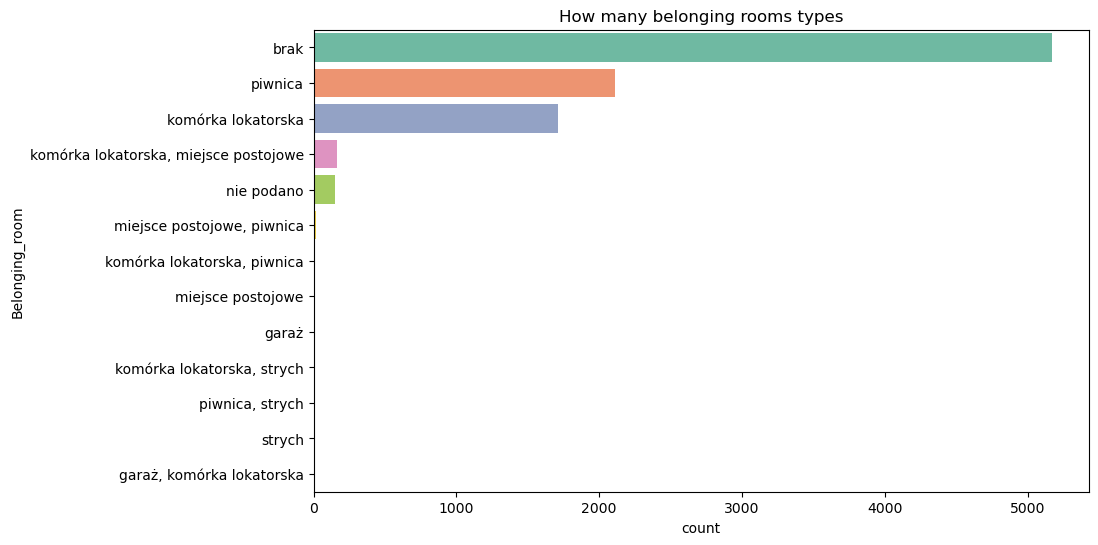

In [129]:
# How many values in the different types are there
fig = plt.figure(figsize=(10,6));
sns.countplot(y='Belonging_room',
              order = df['Belonging_room'].value_counts().index,
              data=df,saturation = 0.80, 
              palette = "Set2").set(title="How many belonging rooms types");

In [130]:
change_to_category_type(df, 'Belonging_room')

## Updated prices
It was created by multiplying price for 1 square meter and usable area.

In [131]:
df['Updated_price'].describe()

count    9.335000e+03
mean     4.531856e+05
std      2.139001e+05
min      2.500000e+04
25%      3.190000e+05
50%      4.000000e+05
75%      5.250000e+05
max      2.330000e+06
Name: Updated_price, dtype: float64

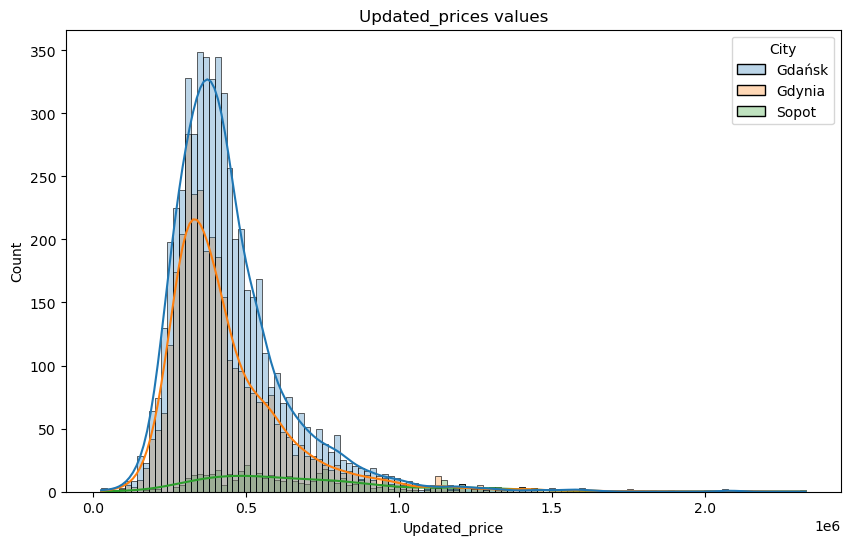

In [132]:
# Histogram
fig = plt.figure(figsize=(10,6));
sns.histplot(x='Updated_price', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Updated_prices values');

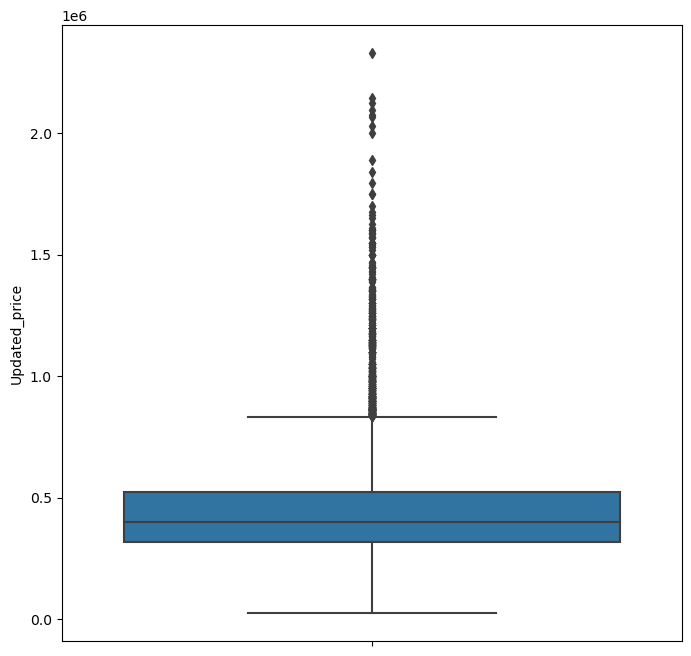

In [133]:
# Outliers
fig = plt.figure(figsize=(8,8));
sns.boxplot(data=df, y='Updated_price');

In [134]:
# Remove outliers
df = remove_outlier(df,'Updated_price', 0.15, 0.85)

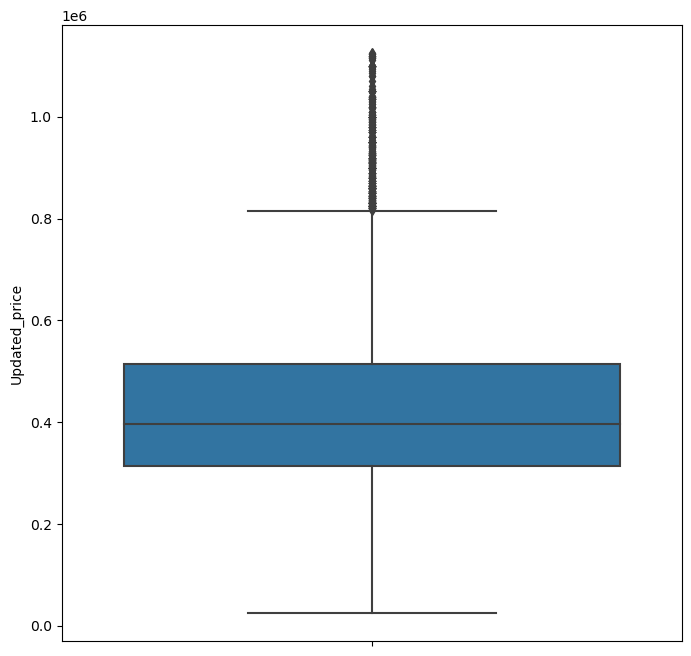

In [136]:
# Let's check the outliers
fig = plt.figure(figsize=(8,8));
sns.boxplot(data=df, y='Updated_price');

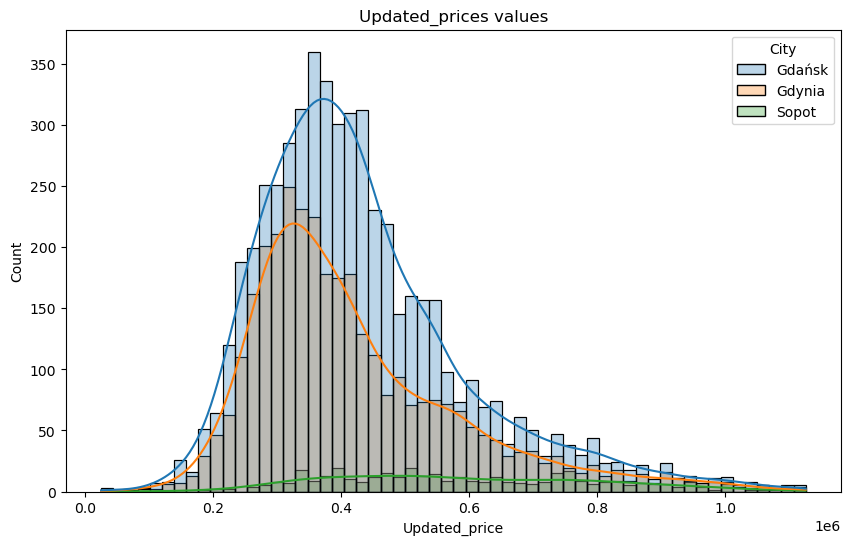

In [137]:
# Histogram after removing outliers
fig = plt.figure(figsize=(10,6));
sns.histplot(x='Updated_price', 
             data=df, 
             hue='City', 
             alpha = 0.3, kde=True).set(title='Updated_prices values');

## Rooms
Number of rooms in the property

In [138]:
df['Rooms'].describe()

count                                          9156
unique                                          597
top       pokój:2,kuchnia:1,łazienka:1,przedpokój:1
freq                                            847
Name: Rooms, dtype: object

In [139]:
df['Rooms'].head()

1    pokój:2,pokój z aneksem kuchennym:1,łazienka:1...
2    pokój:1,pokój z aneksem kuchennym:1,łazienka z...
4    pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...
5            pokój:2,kuchnia:1,łazienka:1,przedpokój:1
6    pokój:2,pokój z aneksem kuchennym:1,łazienka:1...
Name: Rooms, dtype: category
Categories (829, object): ['aneks kuchenny:1,korytarz:1,pomieszczenie usł..., 'antresola:1,ilość izb:1', 'antresola:1,ilość izb:2', 'ilość izb:0', ..., 'wc:1,przedpokój:1,ilość izb:1', 'łazienka:1,przedpokój:1,ilość izb:3', 'łazienka:1,przedpokój:1,weranda:1,ilość izb:5', 'łazienka:1,wc:1,przedpokój:1,ilość izb:3']

In [141]:
# Let's just get numbers out of the sentences
df['Rooms_numbers'] = df['Rooms'].str.replace('\D+', ',')

In [142]:
df['Rooms_numbers'] = df['Rooms_numbers'].str.lstrip(',')

In [143]:
# Time to sum the rooms numbers
df['Rooms_sum'] = df['Rooms_numbers'].apply(lambda x: sum(map(int, x.split(','))))

In [144]:
df.head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
1  Gdańsk      Gdansk_Oliwa  własność-własność        70.10           3.80   
2  Gdańsk   Gdansk_Poludnie  własność-własność        40.00           4.15   
4   Sopot             Sopot  własność-własność        86.00           5.90   
5  Gdańsk      Gdansk_Oliwa  własność-własność        46.00           0.00   
6  Gdynia  Gdynia_Przymorze  własność-własność        56.27           4.08   

   Price_1m2  Updated_price  \
1     356.63        25000.0   
2     773.46        30938.5   
4     854.65        73500.0   
5     869.57        40000.0   
6     977.43        55000.0   

                                               Rooms  Storey  \
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   
5          pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0   
6  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     6.0   

                    Seller                    Buyer  Year  Month  Day  \
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7   
2                deweloper           osoba fizyczna  2020     10   29   
4           osoba fizyczna           osoba fizyczna  2020      6    8   
5           osoba fizyczna           osoba fizyczna  2021      6   23   
6           osoba fizyczna           osoba fizyczna  2021      7   22   

       Belonging_room Rooms_numbers  Rooms_sum  
1  komórka lokatorska     2,1,1,1,1          6  
2  komórka lokatorska       1,1,1,1          4  
4  komórka lokatorska   3,1,1,1,1,1          8  
5                brak       2,1,1,1          5  
6  komórka lokatorska       2,1,1,1          5

In [145]:
df['Rooms_sum'].value_counts()

4      2409
5      2352
6      1337
3      1086
7       831
2       415
8       251
0       156
999     106
1        94
9        57
10       25
11       19
12        7
13        6
16        2
24        1
17        1
18        1
Name: Rooms_sum, dtype: int64

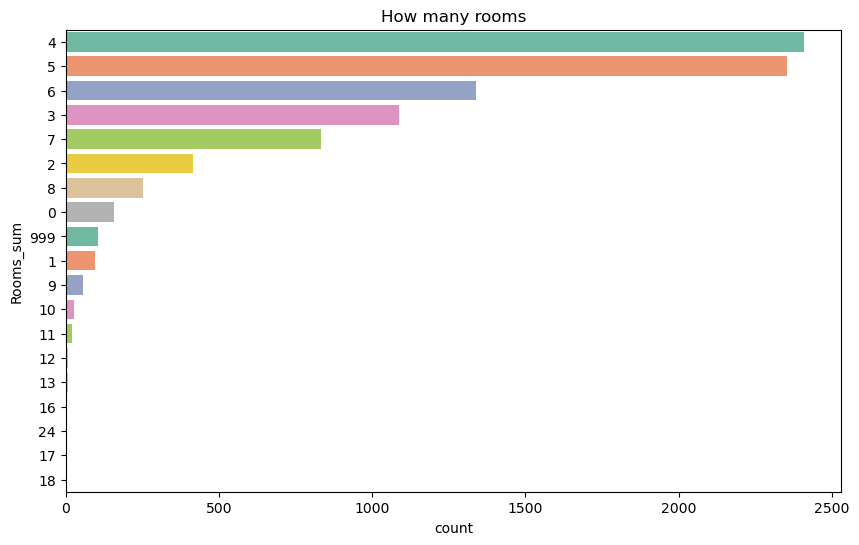

In [146]:
# How many rooms are there
fig = plt.figure(figsize=(10,6));
sns.countplot(y='Rooms_sum', 
              order = df['Rooms_sum'].value_counts().index,
              data=df,saturation = 0.80, 
              palette="Set2").set(title="How many rooms");

In [147]:
# We don't need this column anymore
df = df.drop(['Rooms_numbers'], axis=1)

In [148]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 1 to 10022
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   City            9156 non-null   category
 1   Urban_area      9156 non-null   category
 2   Sold_right      9156 non-null   category
 3   Usable_area     9156 non-null   float64 
 4   Assigned_area   9156 non-null   float64 
 5   Price_1m2       9156 non-null   float64 
 6   Updated_price   9156 non-null   float64 
 7   Rooms           9156 non-null   category
 8   Storey          9156 non-null   float64 
 9   Seller          9156 non-null   category
 10  Buyer           9156 non-null   category
 11  Year            9156 non-null   int64   
 12  Month           9156 non-null   int64   
 13  Day             9156 non-null   int64   
 14  Belonging_room  9156 non-null   category
 15  Rooms_sum       9156 non-null   int64   
dtypes: category(7), float64(5), int64(4)
memory usage: 1.0 MB


## Storey
Floor on which the premises is located.

In [149]:
df['Storey'].describe()

count    9156.000000
mean        4.012888
std        16.385024
min      -100.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       999.000000
Name: Storey, dtype: float64

In [150]:
df['Storey'].value_counts()

 1.0      1853
 2.0      1817
 3.0      1725
 4.0      1485
 5.0      1038
 6.0       290
 7.0       197
 8.0       162
 9.0       133
 10.0      126
 11.0      123
 12.0       39
 0.0        33
 100.0      20
 99.0       19
 13.0       17
 0.1        14
 15.0       14
 14.0       14
 16.0        7
 0.9         6
-100.0       6
 17.0        6
 18.0        6
 999.0       2
 5.5         2
 5.6         2
Name: Storey, dtype: int64

In [152]:
# Let's divide them by 3 categories: bad, good and very good
df['Storey_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['Storey'] <= 0) | (col['Storey'] >= 99), 'Storey_cat'] = 'bad'
    col.loc[(col['Storey'] > 0) & (col['Storey'] <= 1), 'Storey_cat'] = 'very_good'
    col.loc[(col['Storey'] > 1) & (col['Storey']< 99), 'Storey_cat'] = 'good'

In [153]:
df.head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
1  Gdańsk      Gdansk_Oliwa  własność-własność        70.10           3.80   
2  Gdańsk   Gdansk_Poludnie  własność-własność        40.00           4.15   
4   Sopot             Sopot  własność-własność        86.00           5.90   
5  Gdańsk      Gdansk_Oliwa  własność-własność        46.00           0.00   
6  Gdynia  Gdynia_Przymorze  własność-własność        56.27           4.08   

   Price_1m2  Updated_price  \
1     356.63        25000.0   
2     773.46        30938.5   
4     854.65        73500.0   
5     869.57        40000.0   
6     977.43        55000.0   

                                               Rooms  Storey  \
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   
5          pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0   
6  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     6.0   

                    Seller                    Buyer  Year  Month  Day  \
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7   
2                deweloper           osoba fizyczna  2020     10   29   
4           osoba fizyczna           osoba fizyczna  2020      6    8   
5           osoba fizyczna           osoba fizyczna  2021      6   23   
6           osoba fizyczna           osoba fizyczna  2021      7   22   

       Belonging_room  Rooms_sum Storey_cat  
1  komórka lokatorska          6       good  
2  komórka lokatorska          4  very_good  
4  komórka lokatorska          8       good  
5                brak          5       good  
6  komórka lokatorska          5       good

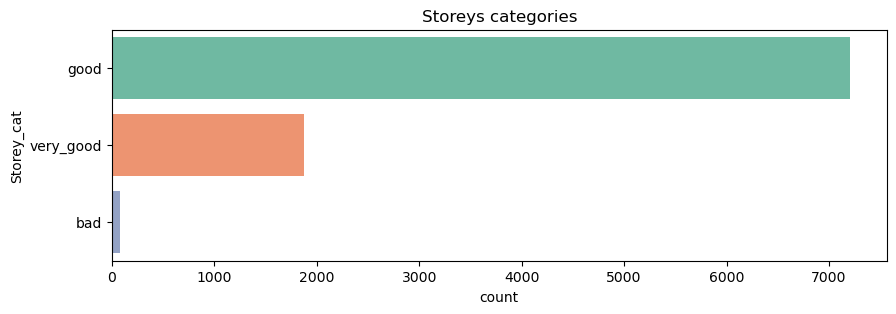

In [154]:
# Let's count them
fig = plt.figure(figsize=(10,3));
sns.countplot(y='Storey_cat',
              order = df['Storey_cat'].value_counts().index,
              data=df,saturation = 0.80, 
              palette = "Set2").set(title="Storeys categories");

In [155]:
change_to_category_type(df, 'Storey_cat')

## Seller

In [156]:
df['Seller'].describe()

count               9156
unique                12
top       osoba fizyczna
freq                7136
Name: Seller, dtype: object

In [157]:
# Let's count them
df['Seller'].value_counts()

osoba fizyczna                     7136
deweloper                          1768
przeds., spółka, firma              107
osoba fizyczna przedsiębiorca        68
spółka prawa handlowego              60
osoba-jedn. zagraniczna               5
spółka cywilna                        4
syndyk                                3
partia, stowarzyszenie, związek       2
Skarb Państwa                         1
gmina                                 1
spółdzielnia                          1
Name: Seller, dtype: int64

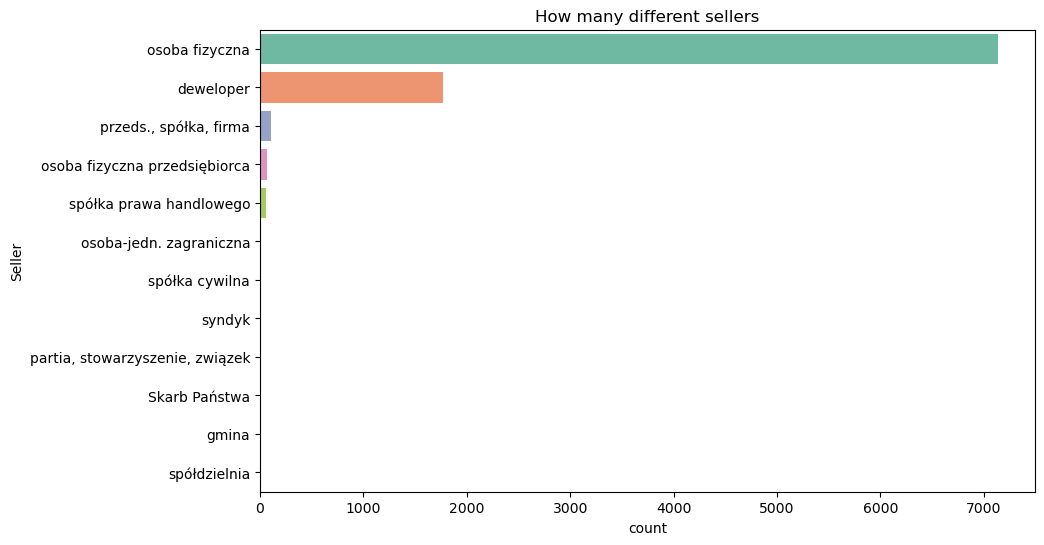

In [158]:
# Let's visualize it
fig = plt.figure(figsize=(10,6));
sns.countplot(y='Seller',
              order=df['Seller'].value_counts().index,
              data=df,
              saturation = 0.80, 
              palette = "Set2").set(title="How many different sellers");

## Buyer

In [160]:
df['Buyer'].describe()

count               9156
unique                 8
top       osoba fizyczna
freq                8929
Name: Buyer, dtype: object

In [161]:
# Let's count them
df['Buyer'].value_counts()

osoba fizyczna                     8929
przeds., spółka, firma              106
spółka prawa handlowego              56
osoba fizyczna przedsiębiorca        49
partia, stowarzyszenie, związek       5
spółka cywilna                        5
osoba-jedn. zagraniczna               4
gmina                                 2
Skarb Państwa                         0
Name: Buyer, dtype: int64

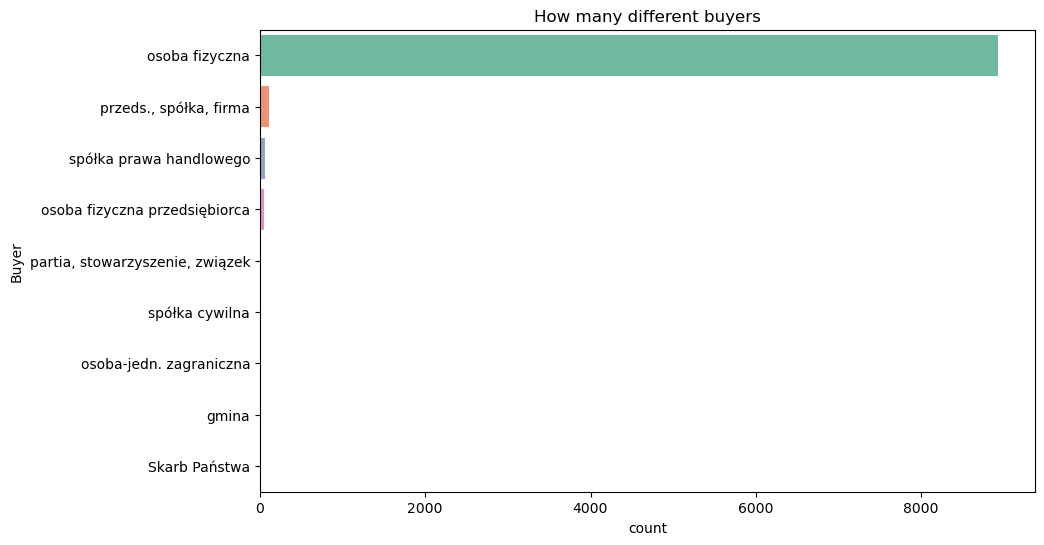

In [162]:
# Visualize it
fig = plt.figure(figsize=(10,6));
sns.countplot(y='Buyer',
              order=df['Buyer'].value_counts().index,
              data=df,saturation = 0.80, 
              palette = "Set2").set(title="How many different buyers");

## Final dataframe

In [163]:
df.head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
1  Gdańsk      Gdansk_Oliwa  własność-własność        70.10           3.80   
2  Gdańsk   Gdansk_Poludnie  własność-własność        40.00           4.15   
4   Sopot             Sopot  własność-własność        86.00           5.90   
5  Gdańsk      Gdansk_Oliwa  własność-własność        46.00           0.00   
6  Gdynia  Gdynia_Przymorze  własność-własność        56.27           4.08   

   Price_1m2  Updated_price  \
1     356.63        25000.0   
2     773.46        30938.5   
4     854.65        73500.0   
5     869.57        40000.0   
6     977.43        55000.0   

                                               Rooms  Storey  \
1  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     4.0   
2  pokój:1,pokój z aneksem kuchennym:1,łazienka z...     1.0   
4  pokój:3,kuchnia:1,wc:1,przedpokój:1,weranda:1,...     2.0   
5          pokój:2,kuchnia:1,łazienka:1,przedpokój:1    11.0   
6  pokój:2,pokój z aneksem kuchennym:1,łazienka:1...     6.0   

                    Seller                    Buyer  Year  Month  Day  \
1  spółka prawa handlowego  spółka prawa handlowego  2021      5    7   
2                deweloper           osoba fizyczna  2020     10   29   
4           osoba fizyczna           osoba fizyczna  2020      6    8   
5           osoba fizyczna           osoba fizyczna  2021      6   23   
6           osoba fizyczna           osoba fizyczna  2021      7   22   

       Belonging_room  Rooms_sum Storey_cat  
1  komórka lokatorska          6       good  
2  komórka lokatorska          4  very_good  
4  komórka lokatorska          8       good  
5                brak          5       good  
6  komórka lokatorska          5       good

In [164]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 1 to 10022
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   City            9156 non-null   category
 1   Urban_area      9156 non-null   category
 2   Sold_right      9156 non-null   category
 3   Usable_area     9156 non-null   float64 
 4   Assigned_area   9156 non-null   float64 
 5   Price_1m2       9156 non-null   float64 
 6   Updated_price   9156 non-null   float64 
 7   Rooms           9156 non-null   category
 8   Storey          9156 non-null   float64 
 9   Seller          9156 non-null   category
 10  Buyer           9156 non-null   category
 11  Year            9156 non-null   int64   
 12  Month           9156 non-null   int64   
 13  Day             9156 non-null   int64   
 14  Belonging_room  9156 non-null   category
 15  Rooms_sum       9156 non-null   int64   
 16  Storey_cat      9156 non-null   category
dtypes: category(8

In [165]:
# Deleting deleteing columns with wrong data
df_final = df.drop(['Updated_price', 'Rooms', 'Storey', 'Rooms_sum'], axis=1)
df_final.head()

City        Urban_area         Sold_right  Usable_area  Assigned_area  \
1  Gdańsk      Gdansk_Oliwa  własność-własność        70.10           3.80   
2  Gdańsk   Gdansk_Poludnie  własność-własność        40.00           4.15   
4   Sopot             Sopot  własność-własność        86.00           5.90   
5  Gdańsk      Gdansk_Oliwa  własność-własność        46.00           0.00   
6  Gdynia  Gdynia_Przymorze  własność-własność        56.27           4.08   

   Price_1m2                   Seller                    Buyer  Year  Month  \
1     356.63  spółka prawa handlowego  spółka prawa handlowego  2021      5   
2     773.46                deweloper           osoba fizyczna  2020     10   
4     854.65           osoba fizyczna           osoba fizyczna  2020      6   
5     869.57           osoba fizyczna           osoba fizyczna  2021      6   
6     977.43           osoba fizyczna           osoba fizyczna  2021      7   

   Day      Belonging_room Storey_cat  
1    7  komórka lokatorska       good  
2   29  komórka lokatorska  very_good  
4    8  komórka lokatorska       good  
5   23                brak       good  
6   22  komórka lokatorska       good

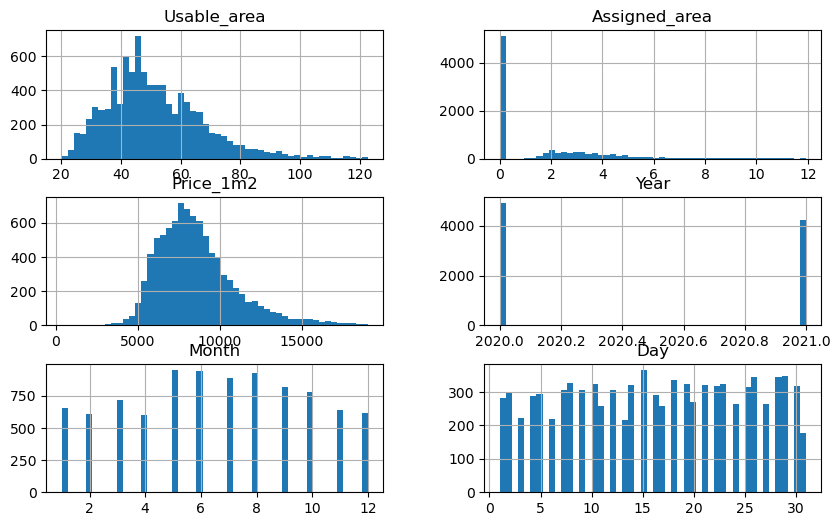

In [167]:
# Numeric data histograms
df_final.hist(bins=50, figsize=(10,6));

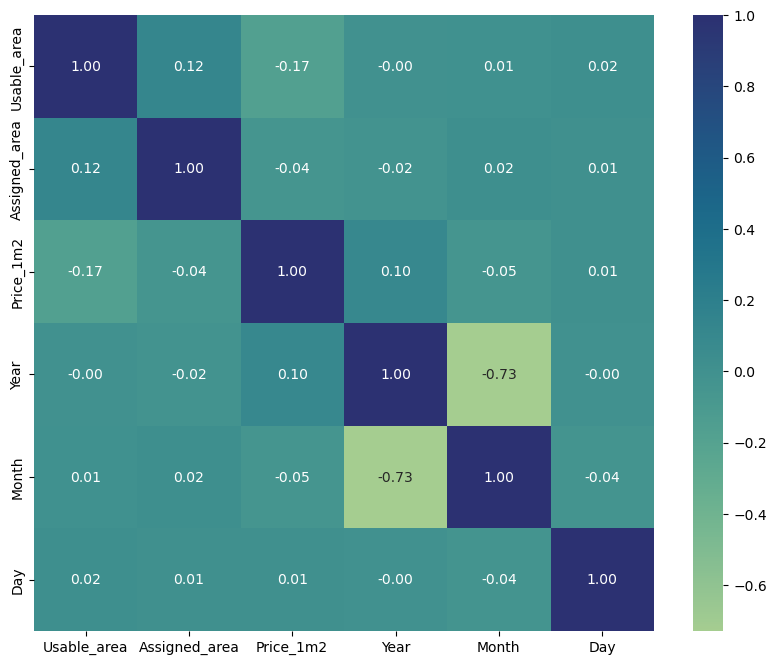

In [168]:
# Check the correlations
plt.figure(figsize=(10,8))
_=sns.heatmap(df_final.corr(), annot=True, fmt=".2f",cmap='crest');

In [173]:
corr_matrix = df_final.corr()

In [174]:
corr_matrix['Price_1m2'].sort_values(ascending=False)

Price_1m2        1.000000
Year             0.095236
Day              0.009304
Assigned_area   -0.040556
Month           -0.050269
Usable_area     -0.170962
Name: Price_1m2, dtype: float64

In [175]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 1 to 10022
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   City            9156 non-null   category
 1   Urban_area      9156 non-null   category
 2   Sold_right      9156 non-null   category
 3   Usable_area     9156 non-null   float64 
 4   Assigned_area   9156 non-null   float64 
 5   Price_1m2       9156 non-null   float64 
 6   Seller          9156 non-null   category
 7   Buyer           9156 non-null   category
 8   Year            9156 non-null   int64   
 9   Month           9156 non-null   int64   
 10  Day             9156 non-null   int64   
 11  Belonging_room  9156 non-null   category
 12  Storey_cat      9156 non-null   category
dtypes: category(7), float64(3), int64(3)
memory usage: 565.6 KB


<Figure size 1500x1000 with 0 Axes>

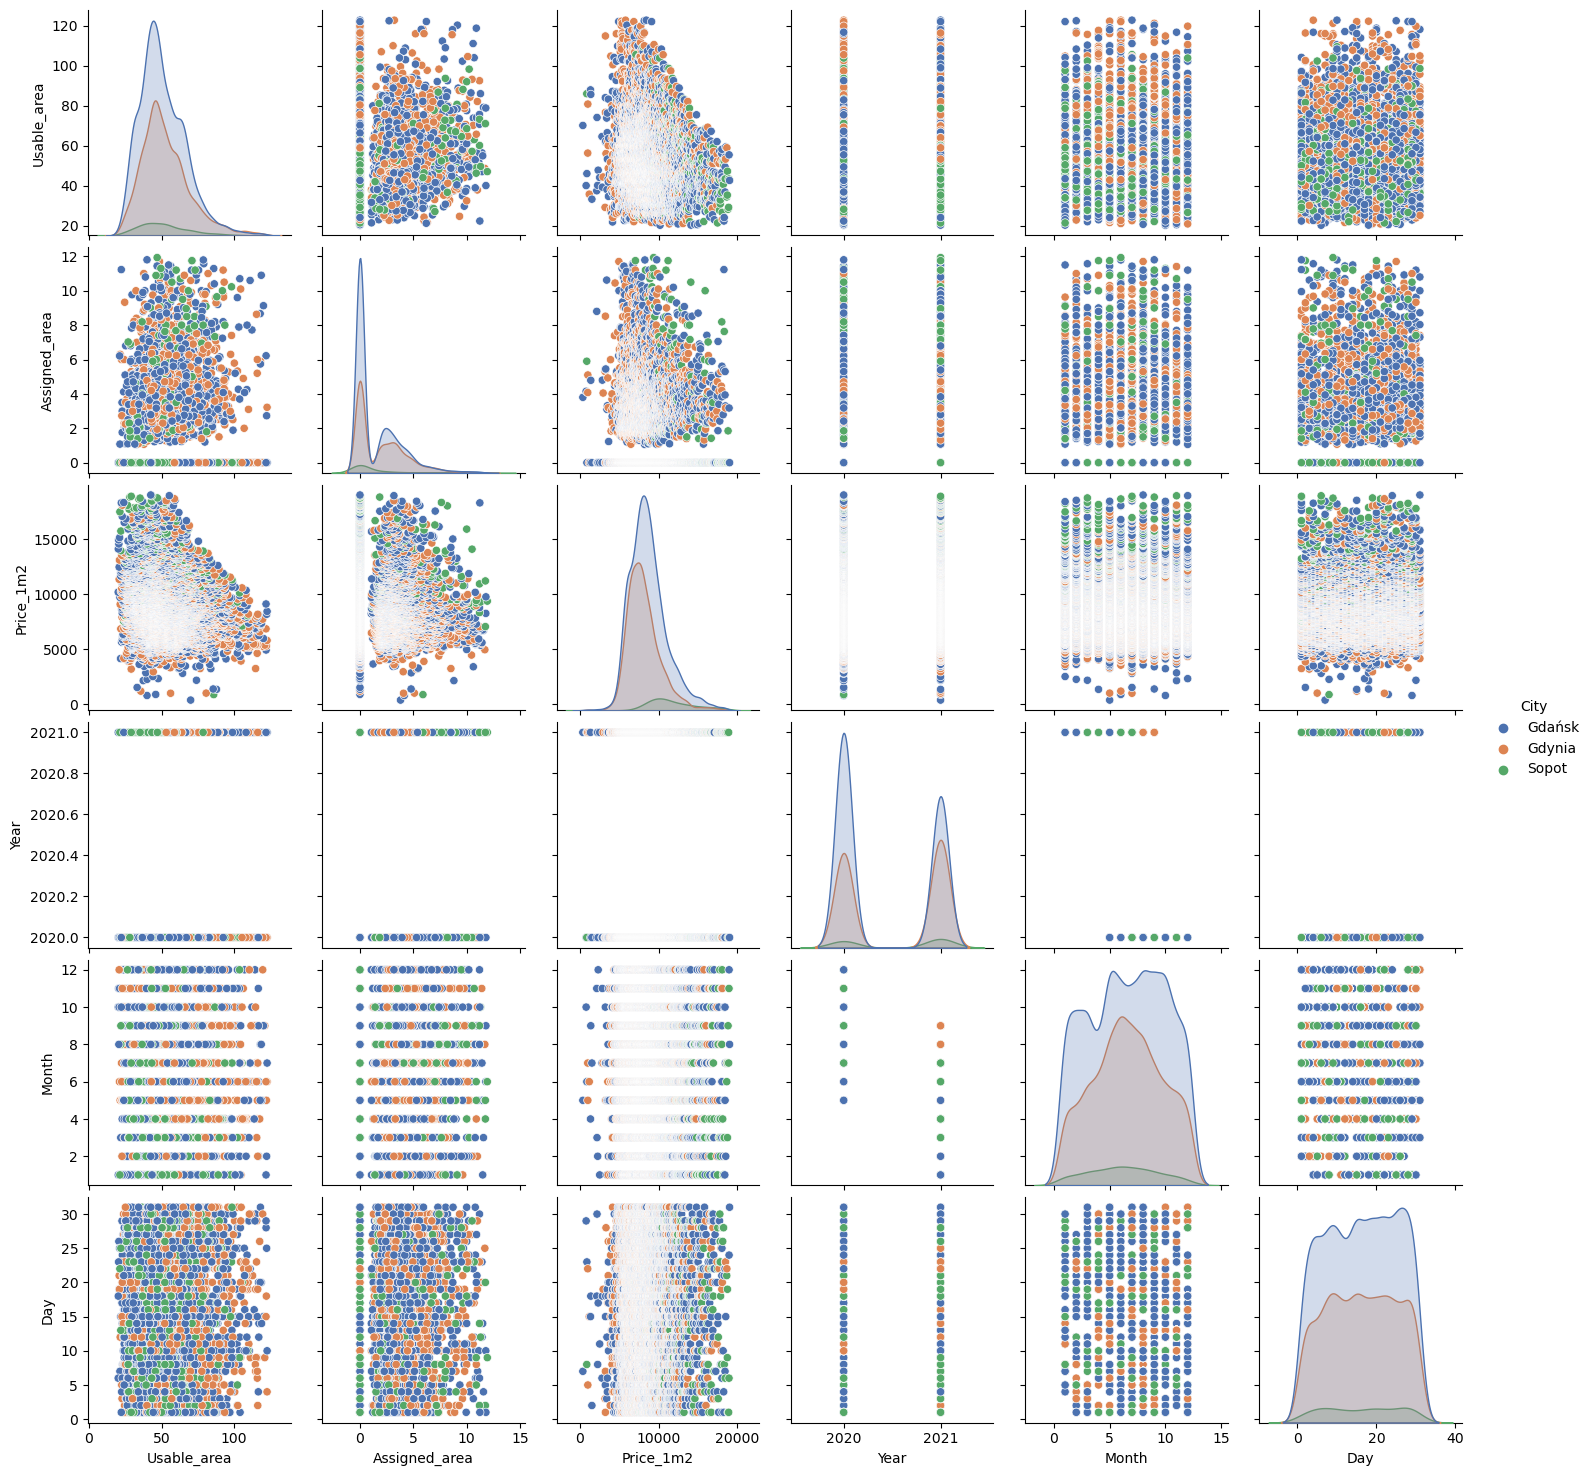

In [171]:
# Check for the dependencies in the data for the cities
fig = plt.figure();
plt.figure(figsize=(15,10));
_=sns.pairplot(df_final, hue='City', palette='deep');
# fig.savefig('./023_pv_pairplot_cities.png')   # save the figure to file
# plt.close(fig) 

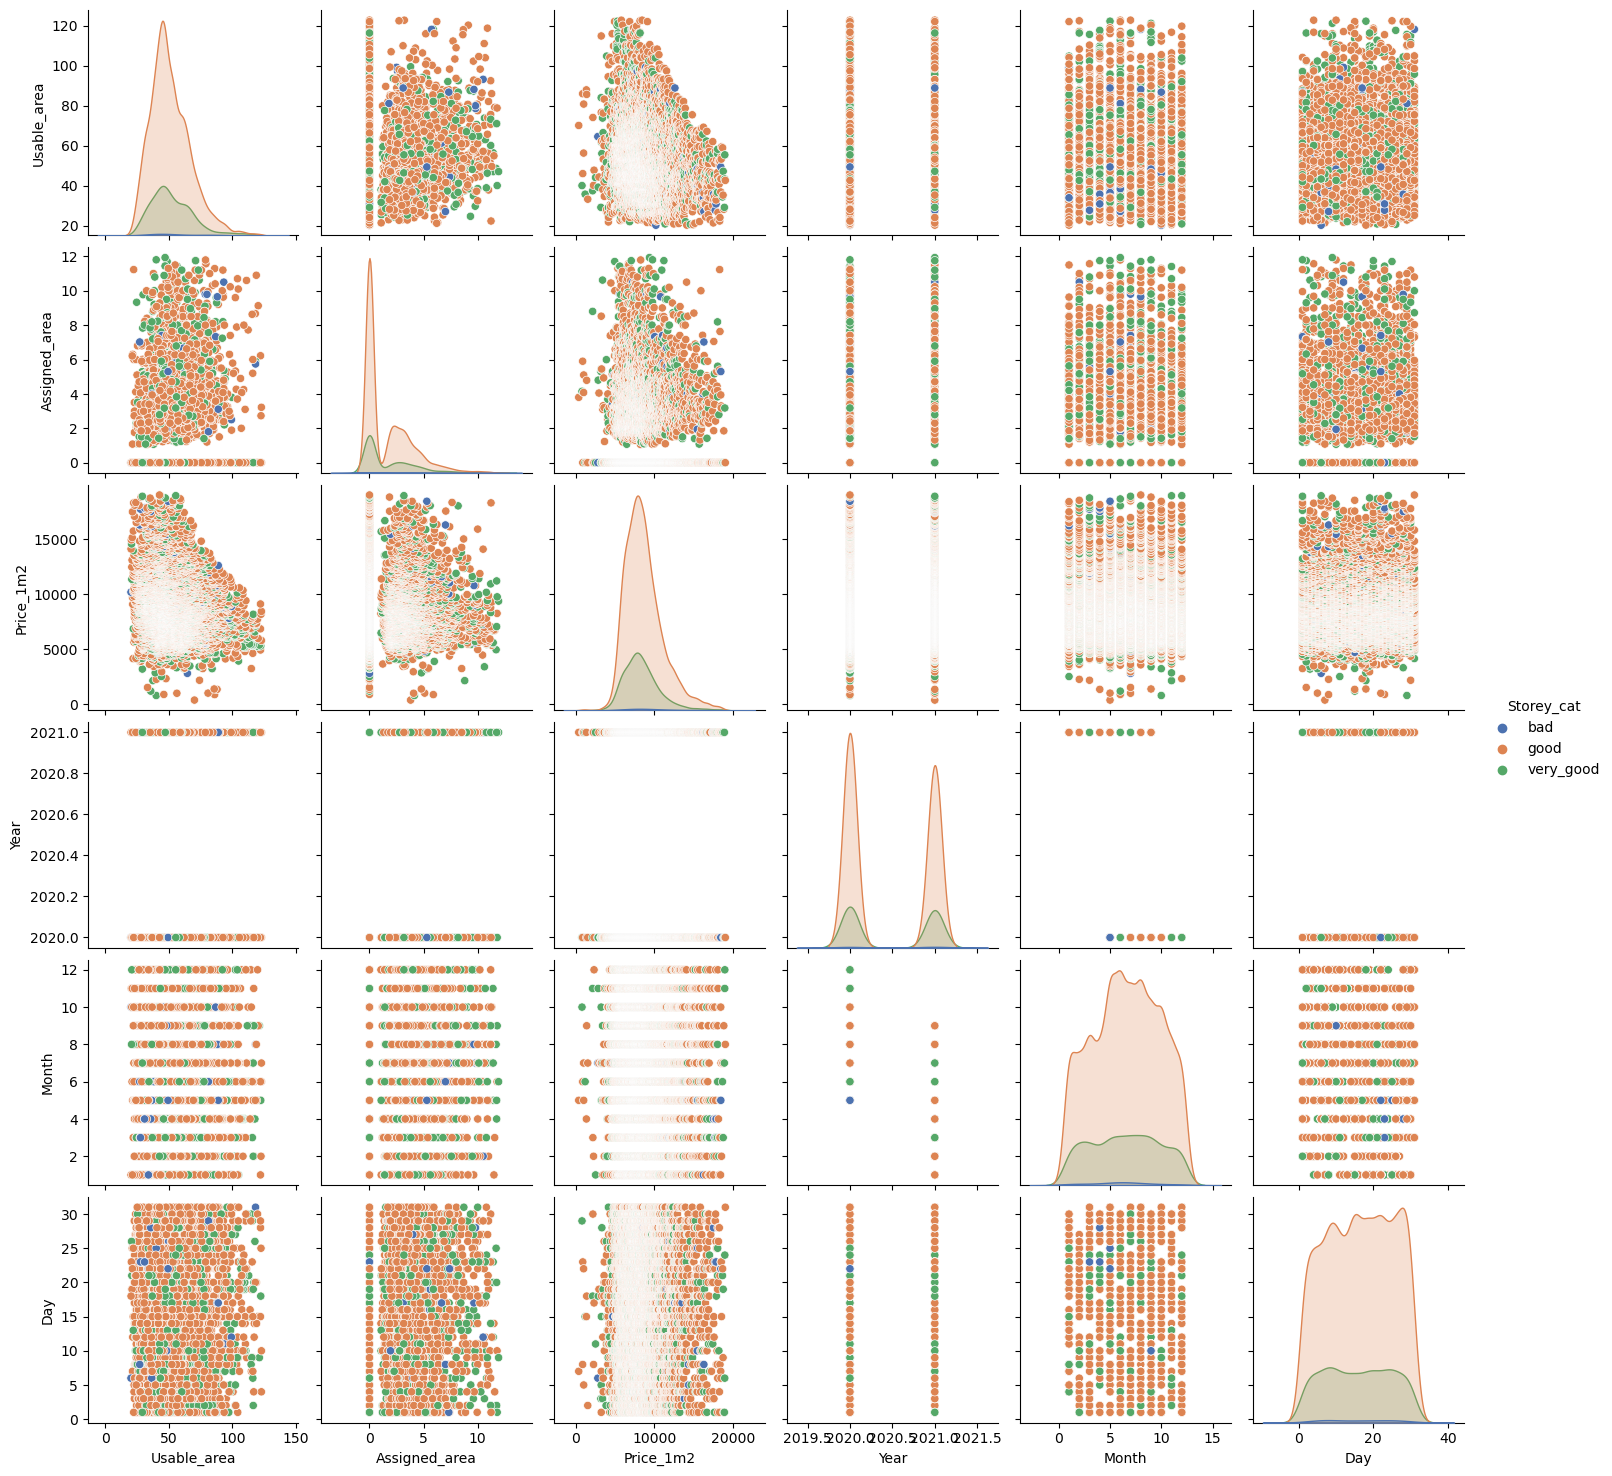

In [176]:
# Check for the dependencies in the data with storey info
_=sns.pairplot(df_final, hue='Storey_cat', palette='deep')

In [177]:
df_final = pd.get_dummies(df_final)
df_final.head()

Usable_area  Assigned_area  Price_1m2  Year  Month  Day  City_Gdańsk  \
1        70.10           3.80     356.63  2021      5    7            1   
2        40.00           4.15     773.46  2020     10   29            1   
4        86.00           5.90     854.65  2020      6    8            0   
5        46.00           0.00     869.57  2021      6   23            1   
6        56.27           4.08     977.43  2021      7   22            0   

   City_Gdynia  City_Sopot  Urban_area_Gdansk_Wrzeszcz  \
1            0           0                           0   
2            0           0                           0   
4            0           1                           0   
5            0           0                           0   
6            1           0                           0   

   Urban_area_Gdynia_Port  Urban_area_Gdansk_Srodmiescie  \
1                       0                              0   
2                       0                              0   
4                       0                              0   
5                       0                              0   
6                       0                              0   

   Urban_area_Gdansk_Oliwa  Urban_area_Gdansk_Zachod  \
1                        1                         0   
2                        0                         0   
4                        0                         0   
5                        1                         0   
6                        0                         0   

   Urban_area_Gdansk_Poludnie  Urban_area_Gdynia_Zachod  \
1                           0                         0   
2                           1                         0   
4                           0                         0   
5                           0                         0   
6                           0                         0   

   Urban_area_Gdynia_Polnoc  Urban_area_Gdynia_Centrum  \
1                         0                          0   
2                         0                          0   
4                         0                          0   
5                         0                          0   
6                         0                          0   

   Urban_area_Gdynia_Przymorze  Urban_area_Gdansk_Port  Urban_area_Sopot  \
1                            0                       0                 0   
2                            0                       0                 0   
4                            0                       0                 1   
5                            0                       0                 0   
6                            1                       0                 0   

   Sold_right_nie podano  Sold_right_spółdzielcze wł. prawo  \
1                      0                                  0   
2                      0                                  0   
4                      0                                  0   
5                      0                                  0   
6                      0                                  0   

   Sold_right_udział ze wskazaniem na lokal  Sold_right_własność-u.wieczyste  \
1                                         0                                0   
2                                         0                                0   
4                                         0                                0   
5                                         0                                0   
6                                         0                                0   

   Sold_right_własność-własność  Seller_Skarb Państwa  Seller_deweloper  \
1                             1                     0                 0   
2                             1                     0                 1   
4                             1                     0                 0   
5                             1                     0                 0   
6                             1                     0                 0   

   Seller_gmina  Seller_osoba fiz

In [178]:
corr_matrix = df_final.corr()
corr_matrix['Price_1m2'].sort_values(ascending=False)

Price_1m2                                               1.000000
Urban_area_Sopot                                        0.267442
City_Sopot                                              0.267442
Urban_area_Gdynia_Przymorze                             0.187224
Urban_area_Gdansk_Oliwa                                 0.180783
Urban_area_Gdansk_Srodmiescie                           0.156737
Seller_osoba fizyczna                                   0.123721
Urban_area_Gdansk_Wrzeszcz                              0.114320
Year                                                    0.095236
Belonging_room_komórka lokatorska                       0.084523
Sold_right_własność-własność                            0.079669
Belonging_room_brak                                     0.065131
Buyer_osoba-jedn. zagraniczna                           0.060216
Sold_right_własność-u.wieczyste                         0.044311
Storey_cat_bad                                          0.042234
Belonging_room_komórka lo

In [180]:
# splitting data into features X, and labels y
X = df_final.drop(['Price_1m2'], axis=1)
y = df_final['Price_1m2']

In [181]:
# View X
X.head()

Usable_area  Assigned_area  Year  Month  Day  City_Gdańsk  City_Gdynia  \
1        70.10           3.80  2021      5    7            1            0   
2        40.00           4.15  2020     10   29            1            0   
4        86.00           5.90  2020      6    8            0            0   
5        46.00           0.00  2021      6   23            1            0   
6        56.27           4.08  2021      7   22            0            1   

   City_Sopot  Urban_area_Gdansk_Wrzeszcz  Urban_area_Gdynia_Port  \
1           0                           0                       0   
2           0                           0                       0   
4           1                           0                       0   
5           0                           0                       0   
6           0                           0                       0   

   Urban_area_Gdansk_Srodmiescie  Urban_area_Gdansk_Oliwa  \
1                              0                        1   
2                              0                        0   
4                              0                        0   
5                              0                        1   
6                              0                        0   

   Urban_area_Gdansk_Zachod  Urban_area_Gdansk_Poludnie  \
1                         0                           0   
2                         0                           1   
4                         0                           0   
5                         0                           0   
6                         0                           0   

   Urban_area_Gdynia_Zachod  Urban_area_Gdynia_Polnoc  \
1                         0                         0   
2                         0                         0   
4                         0                         0   
5                         0                         0   
6                         0                         0   

   Urban_area_Gdynia_Centrum  Urban_area_Gdynia_Przymorze  \
1                          0                            0   
2                          0                            0   
4                          0                            0   
5                          0                            0   
6                          0                            1   

   Urban_area_Gdansk_Port  Urban_area_Sopot  Sold_right_nie podano  \
1                       0                 0                      0   
2                       0                 0                      0   
4                       0                 1                      0   
5                       0                 0                      0   
6                       0                 0                      0   

   Sold_right_spółdzielcze wł. prawo  \
1                                  0   
2                                  0   
4                                  0   
5                                  0   
6                                  0   

   Sold_right_udział ze wskazaniem na lokal  Sold_right_własność-u.wieczyste  \
1                                         0                                0   
2                                         0                                0   
4                                         0                                0   
5                                         0                                0   
6                                         0                                0   

   Sold_right_własność-własność  Seller_Skarb Państwa  Seller_deweloper  \
1                             1                     0                 0   
2                             1                     0                 1   
4                             1                     0                 0   
5                             1                     0                 0   
6                             1                     0                 0   

   Seller_gmina  Seller_osoba fizyczna  Seller_osoba fizyczna przedsiębiorca  \
1             0    

In [182]:
# View y
y.head()

1    356.63
2    773.46
4    854.65
5    869.57
6    977.43
Name: Price_1m2, dtype: float64

In [183]:
# splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=42)

In [184]:
# scaling values - srednia wartosc = 0 , srednie odchylenie 1
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc

array([[-0.2447333 ,  0.79793134, -0.9323739 , ..., -0.0923991 ,
         0.51642011, -0.5032407 ],
       [-0.15652037, -0.73763849, -0.9323739 , ..., -0.0923991 ,
        -1.93640795,  1.98712069],
       [ 1.23773397, -0.73763849, -0.9323739 , ..., -0.0923991 ,
         0.51642011, -0.5032407 ],
       ...,
       [-1.60652037, -0.26048403, -0.9323739 , ..., -0.0923991 ,
        -1.93640795,  1.98712069],
       [-0.86957487,  0.04315972,  1.0725311 , ..., -0.0923991 ,
         0.51642011, -0.5032407 ],
       [-1.02149713, -0.73763849, -0.9323739 , ..., -0.0923991 ,
         0.51642011, -0.5032407 ]])

In [185]:
# test different algorithms to get the data predictions 
scores = []
mae_error = []
rmse_error = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
          'Ridge Regression', 'RandomForest Regression', 
          'KNeighbours Regression', 'SVR', 'ElasticNet','Decision Tree Regression']

Linear Regression R2: 0.37
Linear Regression MAE: 1442.98
Linear Regression RMSE: 1945.72


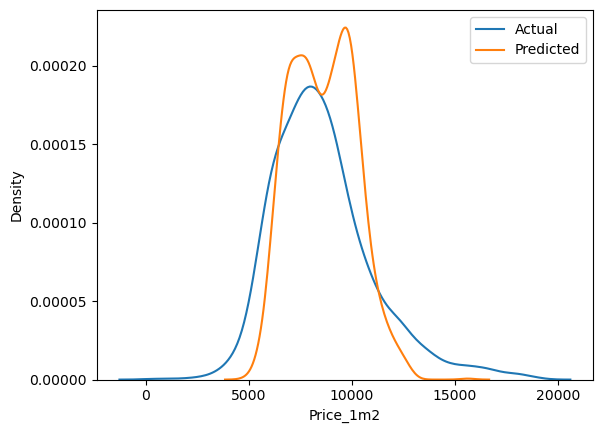

In [186]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mae_error.append(mae)
rmse_error.append(rmse)
scores.append(r2)

print('Linear Regression R2: {0:.2f}'.format(r2))
print('Linear Regression MAE: {0:.2f}'.format(mae))
print('Linear Regression RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [162]:
'''
# Best parameters for Lasso Regression
param  = {'alpha' : [9.0, 11.0, 13.0, 15.0],
          'fit_intercept' : ['True', 'False'],
          'max_iter' : [1000, 3000, 5000], 
#           'warm_start': ['True','False'],
#           'positive': ['True','False'],
          'selection' : ['cyclic', 'random']
          }
glasso = GridSearchCV(estimator = Lasso(random_state=42,),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
glasso.fit(X_train, y_train)
glasso.best_params_, glasso.best_score_
'''

"\n# Best parameters for Lasso Regression\nparam  = {'alpha' : [9.0, 11.0, 13.0, 15.0],\n          'fit_intercept' : ['True', 'False'],\n          'max_iter' : [1000, 3000, 5000], \n#           'warm_start': ['True','False'],\n#           'positive': ['True','False'],\n          'selection' : ['cyclic', 'random']\n          }\nglasso = GridSearchCV(estimator = Lasso(random_state=42,),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\nglasso.fit(X_train, y_train)\nglasso.best_params_, glasso.best_score_\n"

Lasso Regression R2: 0.37
Lasso Regression MAE: 1442.18
Lasso Regression RMSE: 1946.36


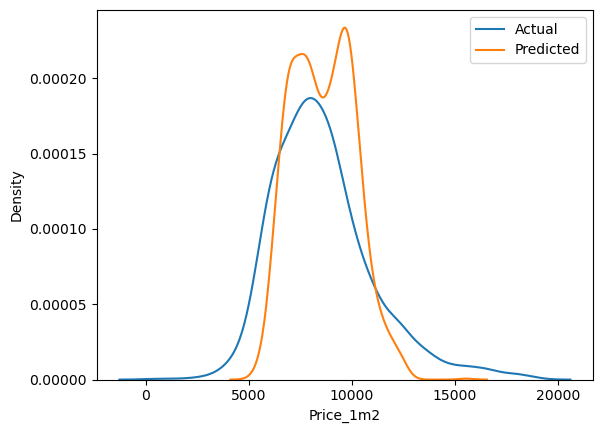

In [187]:
# Lasso
lasso = Lasso(alpha=11.0, fit_intercept=True, max_iter=1000, selection='cyclic', random_state=42)
lasso.fit(X_train_sc , y_train)
y_pred = lasso.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print('Lasso Regression R2: {0:.2f}'.format(r2))
print('Lasso Regression MAE: {0:.2f}'.format(mae))
print('Lasso Regression RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [164]:
'''
# Best parameters for AdaBoost Regressor
param = {'n_estimators':[10,50,250],
         'learning_rate':[0.01,0.1,0.2]}
glasso = GridSearchCV(estimator = AdaBoostRegressor(random_state=42,),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
glasso.fit(X_train, y_train)
glasso.best_params_, glasso.best_score_
'''

"\n# Best parameters for AdaBoost Regressor\nparam = {'n_estimators':[10,50,250],\n         'learning_rate':[0.01,0.1,0.2]}\nglasso = GridSearchCV(estimator = AdaBoostRegressor(random_state=42,),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\nglasso.fit(X_train, y_train)\nglasso.best_params_, glasso.best_score_\n"

AdaBoost Regression R2: 0.28
AdaBoost Regression MAE: 1584.34
AdaBoost Regression RMSE: 2092.53


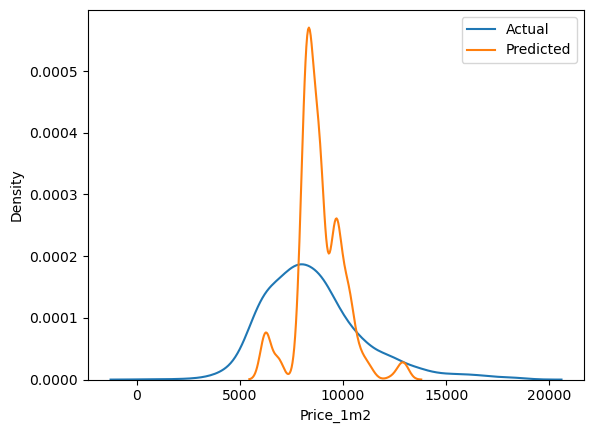

In [188]:
# Adaboost regressor
adaboost = AdaBoostRegressor(learning_rate=0.1,n_estimators=50,random_state=42)
adaboost.fit(X_train_sc , y_train)
y_pred = adaboost.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print('AdaBoost Regression R2: {0:.2f}'.format(r2))
print('AdaBoost Regression MAE: {0:.2f}'.format(mae))
print('AdaBoost Regression RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [166]:
'''
# Best parameters for Ridge
param  = {'alpha':[100, 200, 500],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
gridge = GridSearchCV(estimator = Ridge(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gridge.fit(X_train, y_train)
gridge.best_params_, gridge.best_score_
'''

"\n# Best parameters for Ridge\nparam  = {'alpha':[100, 200, 500],\n         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}\ngridge = GridSearchCV(estimator = Ridge(random_state=42,),\nparam_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\ngridge.fit(X_train, y_train)\ngridge.best_params_, gridge.best_score_\n"

Ridge Regression R2: 0.37
Ridge Regression MAE: 1440.99
Ridge Regression RMSE: 1945.39


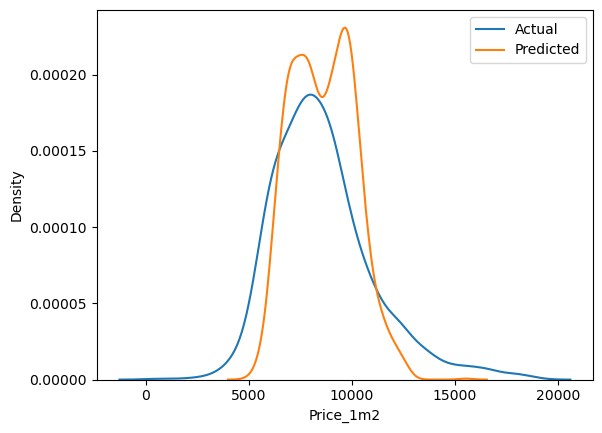

In [189]:
# Ridge
ridge = Ridge(alpha=200, solver='saga',random_state=42)
ridge.fit(X_train_sc , y_train)
y_pred = ridge.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print('Ridge Regression R2: {0:.2f}'.format(r2))
print('Ridge Regression MAE: {0:.2f}'.format(mae))
print('Ridge Regression RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [168]:
'''
# Best parameters for Random forest
param  = {'n_estimators' : [100, 200, 300],
         'max_features' : ['auto', 'sqrt', 'log2'],
         'max_depth' : [15,20,30],
         'criterion' : ["squared_error", "absolute_error", "poisson"]}
grf = GridSearchCV(estimator = RandomForestRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
grf.fit(X_train, y_train)
grf.best_params_, grf.best_score_
'''

'\n# Best parameters for Random forest\nparam  = {\'n_estimators\' : [100, 200, 300],\n         \'max_features\' : [\'auto\', \'sqrt\', \'log2\'],\n         \'max_depth\' : [15,20,30],\n         \'criterion\' : ["squared_error", "absolute_error", "poisson"]}\ngrf = GridSearchCV(estimator = RandomForestRegressor(random_state=42,),\nparam_grid = param,scoring= \'r2\' ,cv = 5,  n_jobs = -1)\ngrf.fit(X_train, y_train)\ngrf.best_params_, grf.best_score_\n'

Random Forest R2: 0.48
Random Forest MAE: 1247.96
Random Forest RMSE: 1769.82


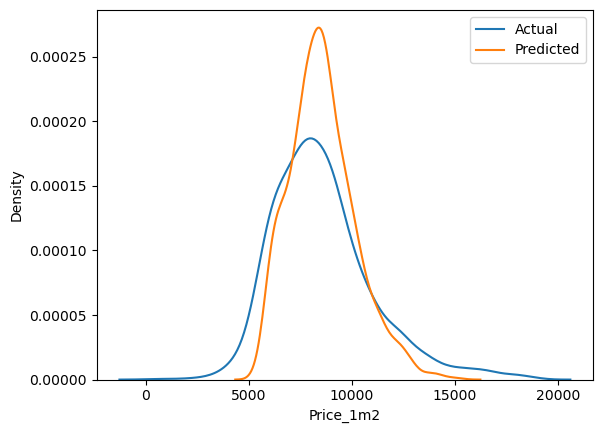

In [190]:
# Random forest
randomforest = RandomForestRegressor(criterion='absolute_error',max_depth=20,max_features='sqrt',n_estimators=300,random_state=42)
randomforest .fit(X_train_sc , y_train)
y_pred = randomforest .predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print('Random Forest R2: {0:.2f}'.format(r2))
print('Random Forest MAE: {0:.2f}'.format(mae))
print('Random Forest RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [170]:
'''
# Best parameters for KNeighbours
param = {'n_neighbors':[20, 30, 50],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'weights' : ['uniform', 'distance'],
         'leaf_size' : [40, 50, 70]}
gkn = GridSearchCV(estimator = KNeighborsRegressor(),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
gkn.fit(X_train, y_train)
gkn.best_params_, gkn.best_score_
'''

"\n# Best parameters for KNeighbours\nparam = {'n_neighbors':[20, 30, 50],\n         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],\n          'weights' : ['uniform', 'distance'],\n         'leaf_size' : [40, 50, 70]}\ngkn = GridSearchCV(estimator = KNeighborsRegressor(),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\ngkn.fit(X_train, y_train)\ngkn.best_params_, gkn.best_score_\n"

K-Neighbours Regression R2: 0.44
K-Neighbours MAE: 1313.38
SVR MAE: 1313.38


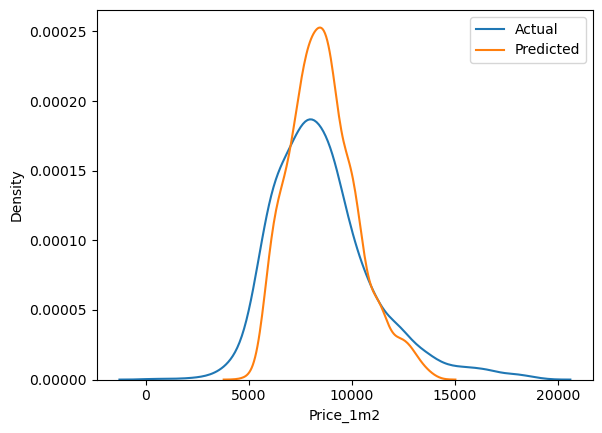

In [191]:
# K-Neighbours
kneighbours = KNeighborsRegressor(algorithm='kd_tree',leaf_size=50,n_neighbors=30,weights='distance')
kneighbours.fit(X_train_sc , y_train)
y_pred = kneighbours.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print('K-Neighbours Regression R2: {0:.2f}'.format(r2))
print('K-Neighbours MAE: {0:.2f}'.format(mae))
print('SVR MAE: {0:.2f}'.format(mae))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [172]:
'''
# Best parameters for SVR
param  = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'gamma' : ['scale', 'auto'],
         'C': [2.0,3.0,4.0, 0.5],
         'epsilon' : [0.3, 0.4, 0.5]}
gsvr = GridSearchCV(estimator = SVR(),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gsvr.fit(X_train, y_train)
gsvr.best_params_, gsvr.best_score_
'''

"\n# Best parameters for SVR\nparam  = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],\n         'gamma' : ['scale', 'auto'],\n         'C': [2.0,3.0,4.0, 0.5],\n         'epsilon' : [0.3, 0.4, 0.5]}\ngsvr = GridSearchCV(estimator = SVR(),\nparam_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\ngsvr.fit(X_train, y_train)\ngsvr.best_params_, gsvr.best_score_\n"

SVR R2: 0.36
SVR MAE: 1421.73
SVR RMSE: 1968.76


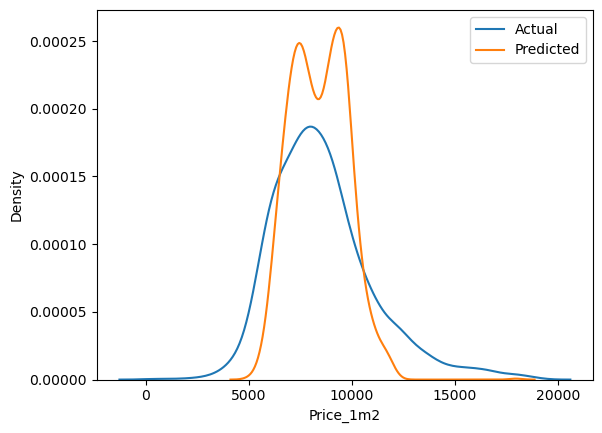

In [192]:
# SVR
svr = SVR(C=4.0, epsilon=0.4, gamma='scale',kernel='linear')
svr.fit(X_train_sc, y_train)
y_pred = svr.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print("SVR R2: {0:.2f}".format(r2))
print('SVR MAE: {0:.2f}'.format(mae))
print('SVR RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [174]:
'''
# Best parameters for ElasticNet
param  = {'alpha' : [0.1, 0.3, 0.5],
         'l1_ratio' : [0.8,0.9, 1.0],
         'fit_intercept' : ['True', 'False'],
         'max_iter' : [100, 200, 300]}
gelanet = GridSearchCV(estimator = ElasticNet(random_state=42),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
gelanet.fit(X_train, y_train)
gelanet.best_params_, gelanet.best_score_
'''

"\n# Best parameters for ElasticNet\nparam  = {'alpha' : [0.1, 0.3, 0.5],\n         'l1_ratio' : [0.8,0.9, 1.0],\n         'fit_intercept' : ['True', 'False'],\n         'max_iter' : [100, 200, 300]}\ngelanet = GridSearchCV(estimator = ElasticNet(random_state=42),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\ngelanet.fit(X_train, y_train)\ngelanet.best_params_, gelanet.best_score_\n"

ElasticNet R2: 0.37
ElasticNet MAE: 1440.77
ElasticNet RMSE: 1945.31


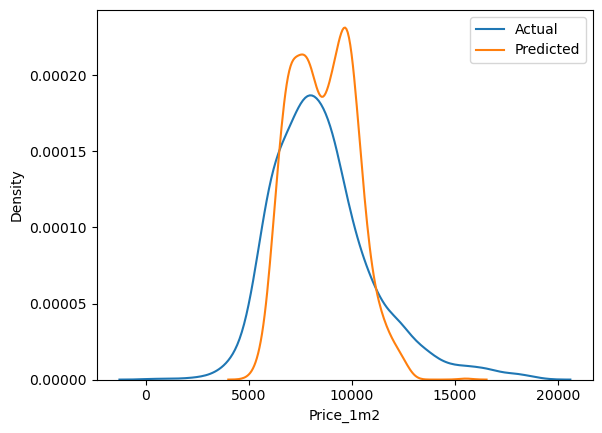

In [193]:
# ElasticNet
elanet = ElasticNet(alpha=0.3, fit_intercept=True, l1_ratio=0.9, max_iter=200, random_state=42) #2 hiperparametry alpha do l2 i ratio do lasso
elanet.fit(X_train_sc, y_train)
y_pred = elanet.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print("ElasticNet R2: {0:.2f}".format(r2))
print('ElasticNet MAE: {0:.2f}'.format(mae))
print('ElasticNet RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [176]:
'''
# Best parameters for Decision tree
param  = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'splitter' : ['best', 'random'],
         'max_depth' : [3, 5, None],
         'min_samples_split' : [1,2, 4,],
         'min_samples_leaf' : [3, 5, 7],
         'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
         'max_features' : ['auto', 'sqrt', 'log2']}
gdt = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gdt.fit(X_train, y_train)
gdt.best_params_, gdt.best_score_
'''

"\n# Best parameters for Decision tree\nparam  = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],\n         'splitter' : ['best', 'random'],\n         'max_depth' : [3, 5, None],\n         'min_samples_split' : [1,2, 4,],\n         'min_samples_leaf' : [3, 5, 7],\n         'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],\n         'max_features' : ['auto', 'sqrt', 'log2']}\ngdt = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42,),\nparam_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\ngdt.fit(X_train, y_train)\ngdt.best_params_, gdt.best_score_\n"

DecisionTree Regression R2: 0.25
DecisionTree Regression MAE: 1523.38
DecisionTree Regression RMSE: 2136.00


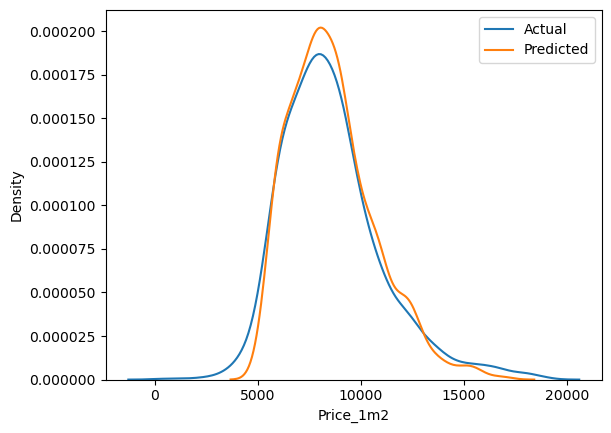

In [194]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(criterion='squared_error',max_depth=None, max_features='auto', min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, splitter='best', random_state=42)
dt.fit(X_train_sc, y_train)
y_pred = dt.predict(X_test_sc)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse_error.append(rmse)
mae_error.append(mae)
scores.append(r2)

print("DecisionTree Regression R2: {0:.2f}".format(r2))
print('DecisionTree Regression MAE: {0:.2f}'.format(mae))
print('DecisionTree Regression RMSE: {0:.2f}'.format(rmse))

sns.distplot(y_test, hist = False, label = 'Actual')
sns.distplot(y_pred, hist = False, label = 'Predicted')
plt.legend()

In [195]:
# Ranking
ranking = pd.DataFrame({'Algorithms' : models, 'R2-Score' : scores, 'Mean Absolute Error' : mae_error, 'Root Mean Squared Error':rmse_error}, dtype=float)
ranking = ranking.sort_values(by='R2-Score', ascending=False)
ranking

Algorithms  R2-Score  Mean Absolute Error  \
4   RandomForest Regression  0.481807          1247.956904   
5    KNeighbours Regression  0.444471          1313.383835   
7                ElasticNet  0.373952          1440.766073   
3          Ridge Regression  0.373900          1440.988569   
0         Linear Regression  0.373688          1442.983989   
1          Lasso Regression  0.373271          1442.181624   
6                       SVR  0.358766          1421.729167   
2       AdaBoost Regression  0.275609          1584.344197   
8  Decision Tree Regression  0.245198          1523.383165   

   Root Mean Squared Error  
4              1769.822694  
5              1832.472794  
7              1945.306787  
3              1945.386854  
0              1945.716510  
1              1946.364471  
6              1968.758979  
2              2092.525828  
8              2135.996678

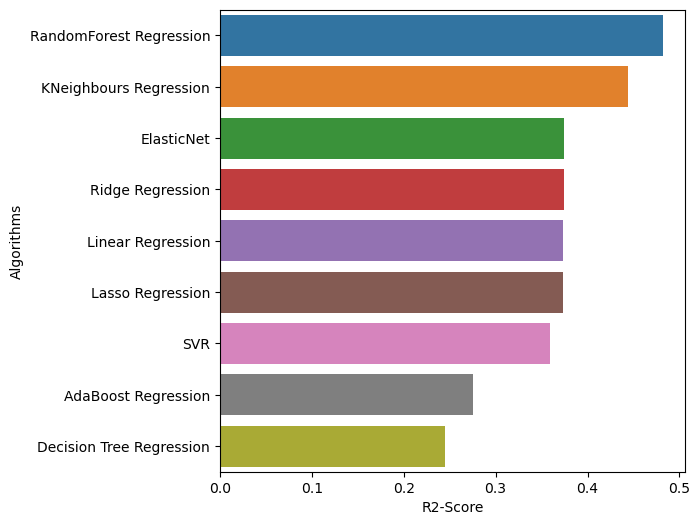

In [196]:
plt.figure(figsize=(6,6))
sns.barplot(x='R2-Score', y='Algorithms', data=ranking[['Algorithms', 'R2-Score']]);

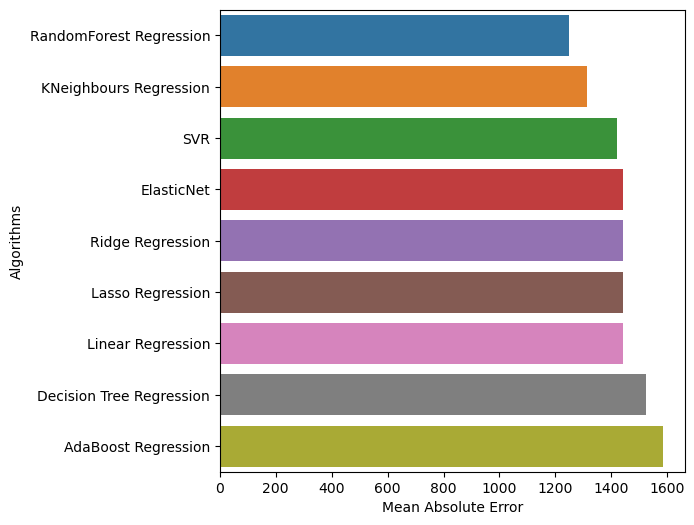

In [197]:
ranking = ranking.sort_values(by='Mean Absolute Error', ascending=True)
plt.figure(figsize=(6,6))
sns.barplot(x='Mean Absolute Error', y='Algorithms', data=ranking[['Algorithms', 'Mean Absolute Error']]);

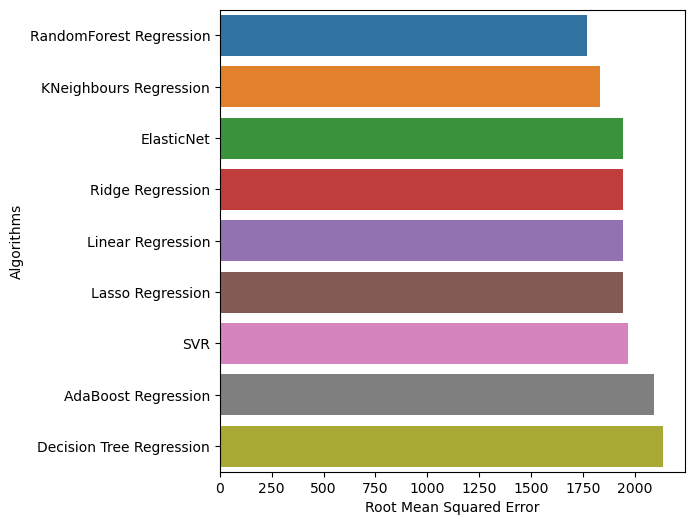

In [198]:
ranking = ranking.sort_values(by='Root Mean Squared Error', ascending=True)
plt.figure(figsize=(6,6))
sns.barplot(x='Root Mean Squared Error', y='Algorithms', data=ranking[['Algorithms', 'Root Mean Squared Error']]);

In [200]:
# Feature importance fuction
'''
Function to show which features are most important in the model.
::param_model:: Which model to use?
::param_data:: What data to use?
'''
def feature_importance(model, data):
    fea_imp=pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp =fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _= fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10,10), colormap = "Set2").set(title='Feature importance')
    
    return fea_imp

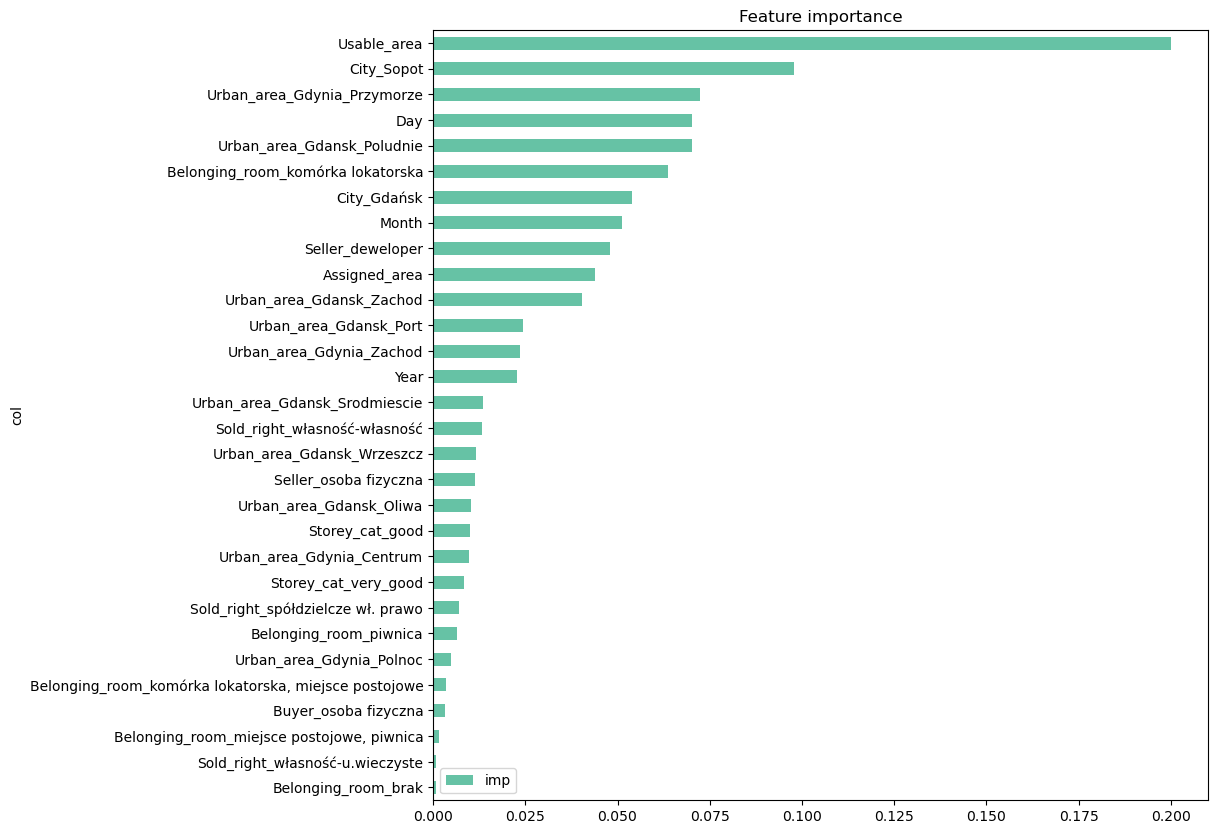

In [202]:
# Feature importance for Decision Tree
feature_importance(dt, X_train);

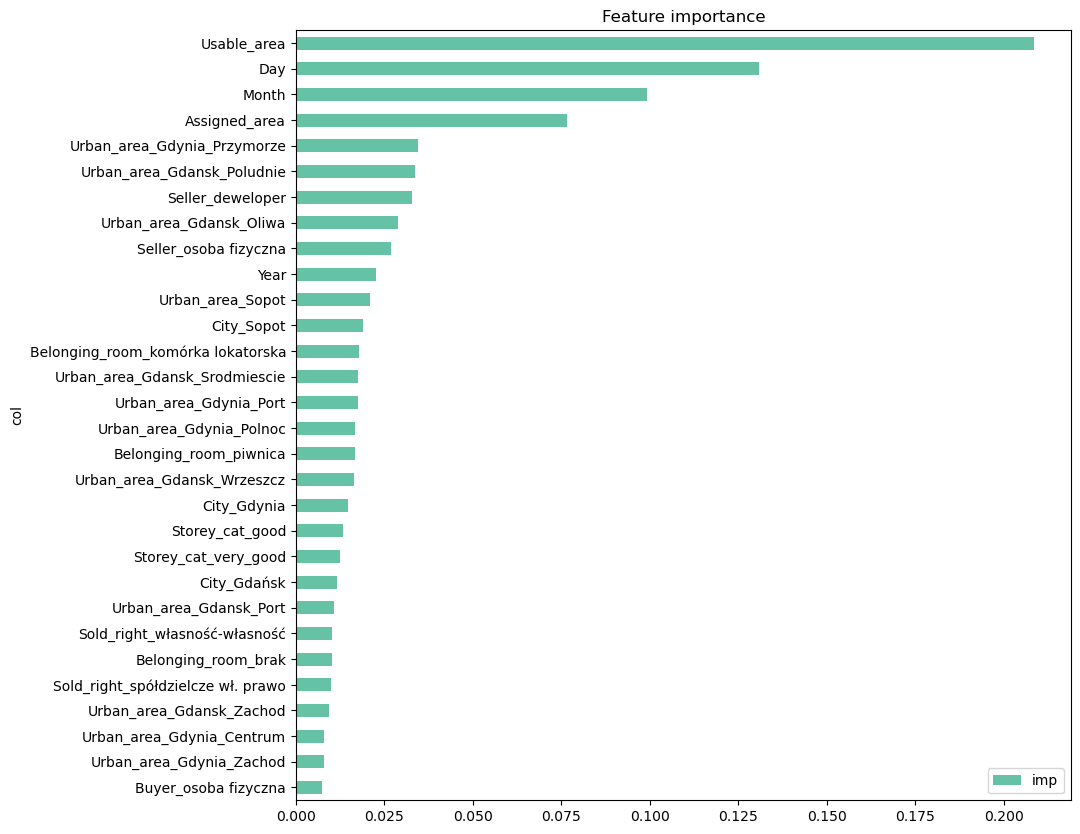

In [204]:
# Feature importance for Random Forest
feature_importance(randomforest, X_train);

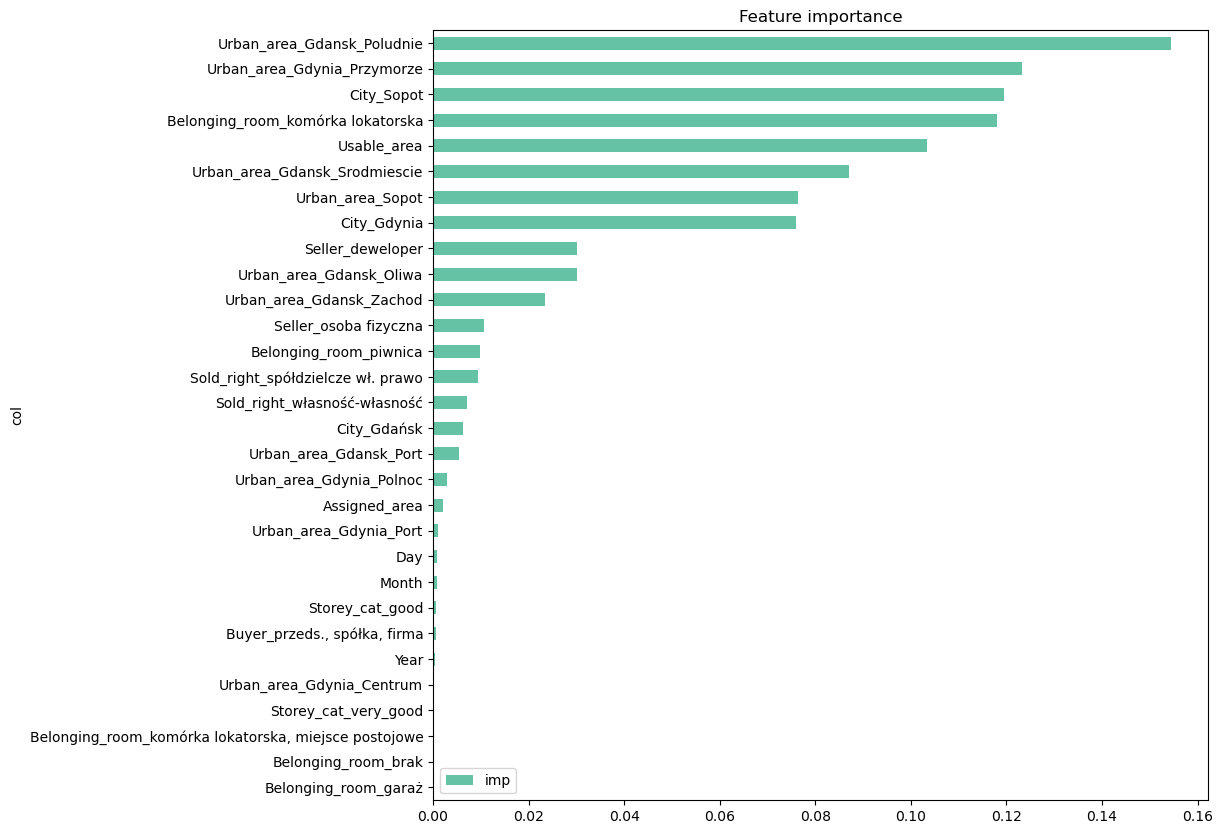

In [205]:
# Feature importance for Adaboost
feature_importance(adaboost, X_train);

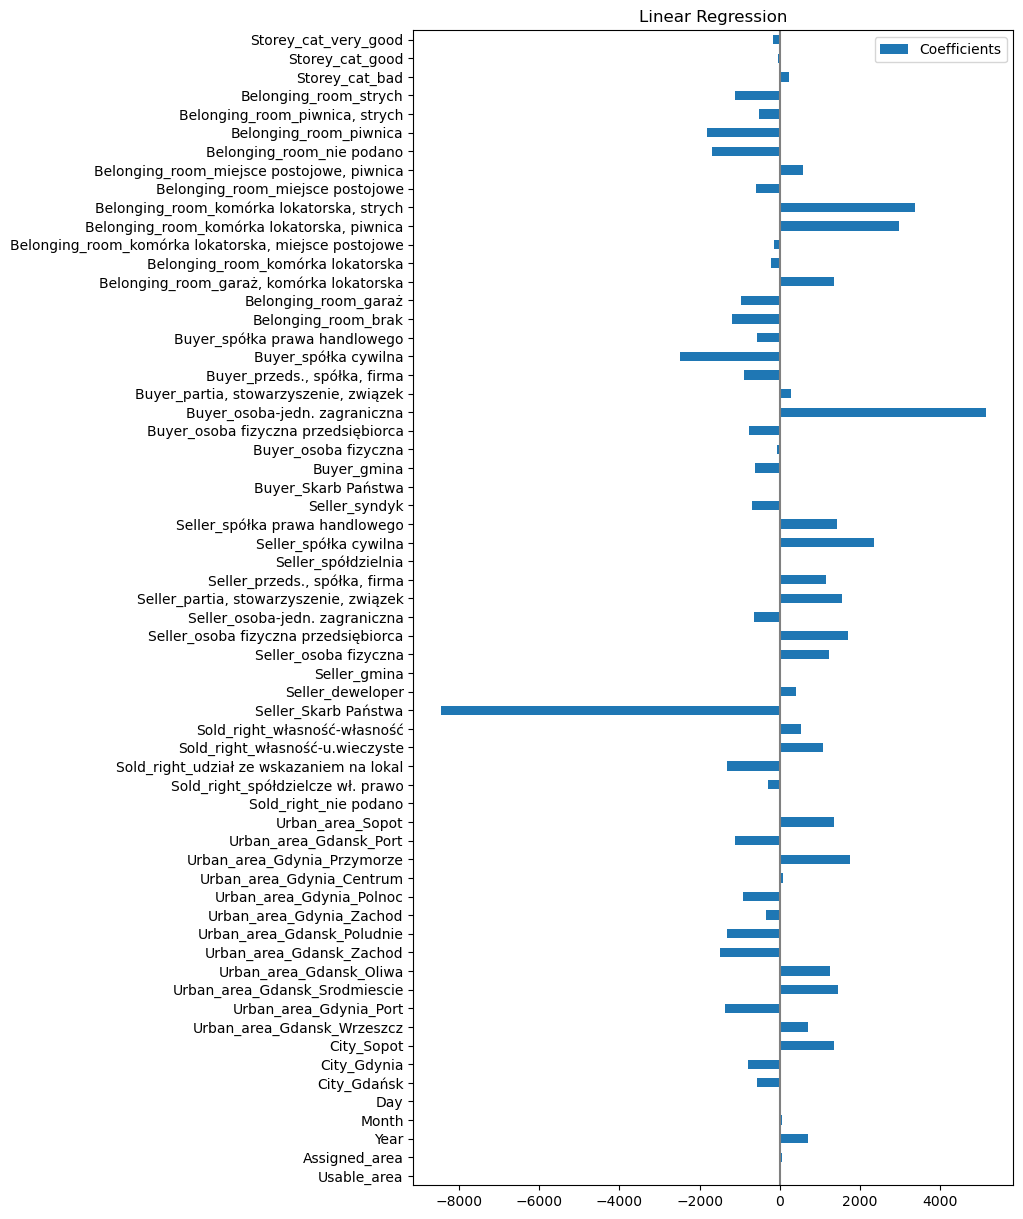

In [206]:
# Feature importance for Linear Regression
coefs = pd.DataFrame(
   lr.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(10, 15))
plt.title('Linear Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

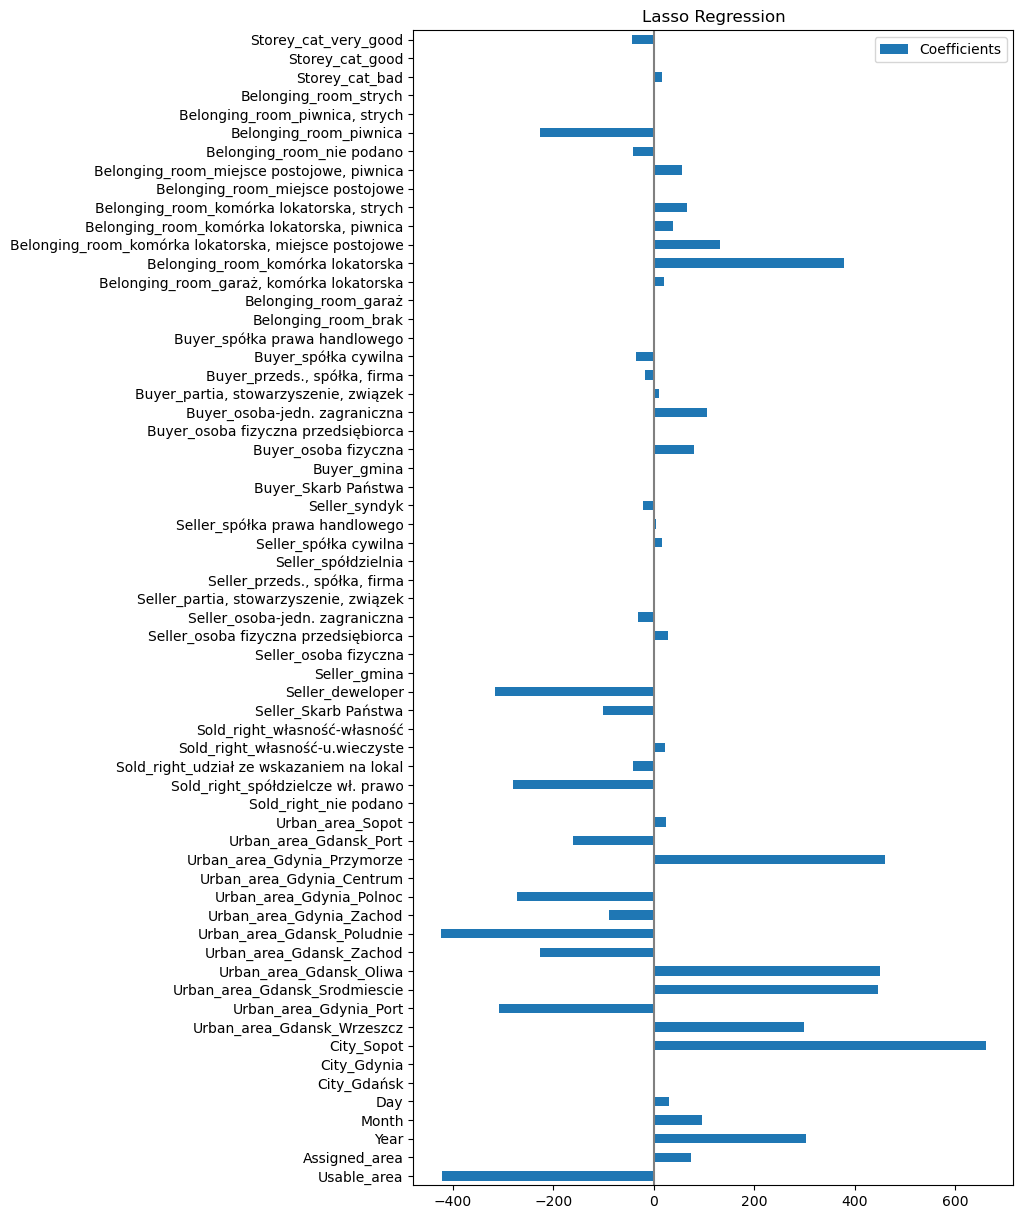

In [207]:
# Feature importance for Lasso
coefs = pd.DataFrame(
   lasso.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(10, 15))
plt.title('Lasso Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

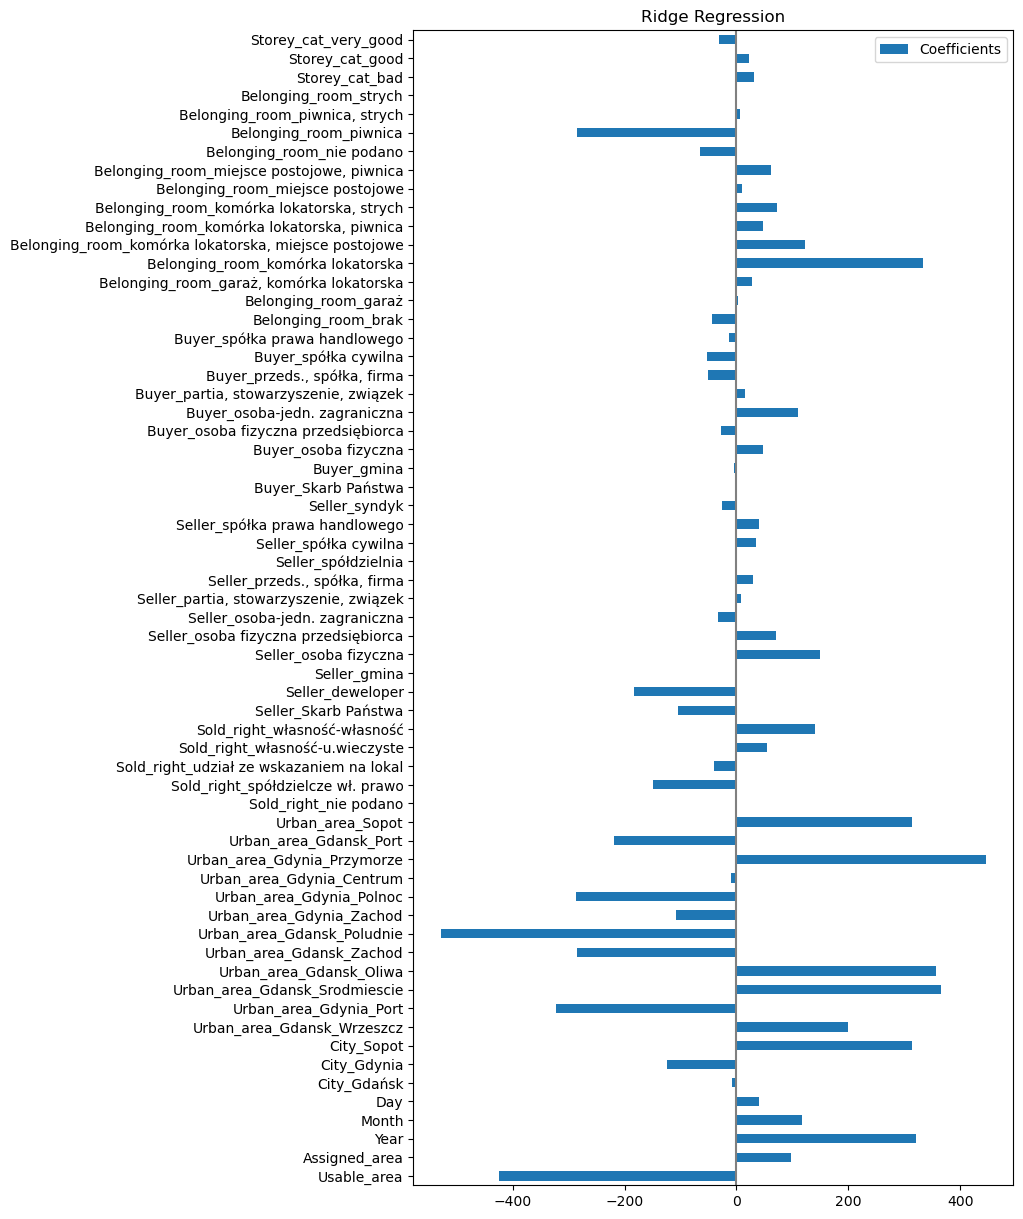

In [208]:
# Feature importance for Ridge
coefs = pd.DataFrame(
   ridge.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(10, 15))
plt.title('Ridge Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

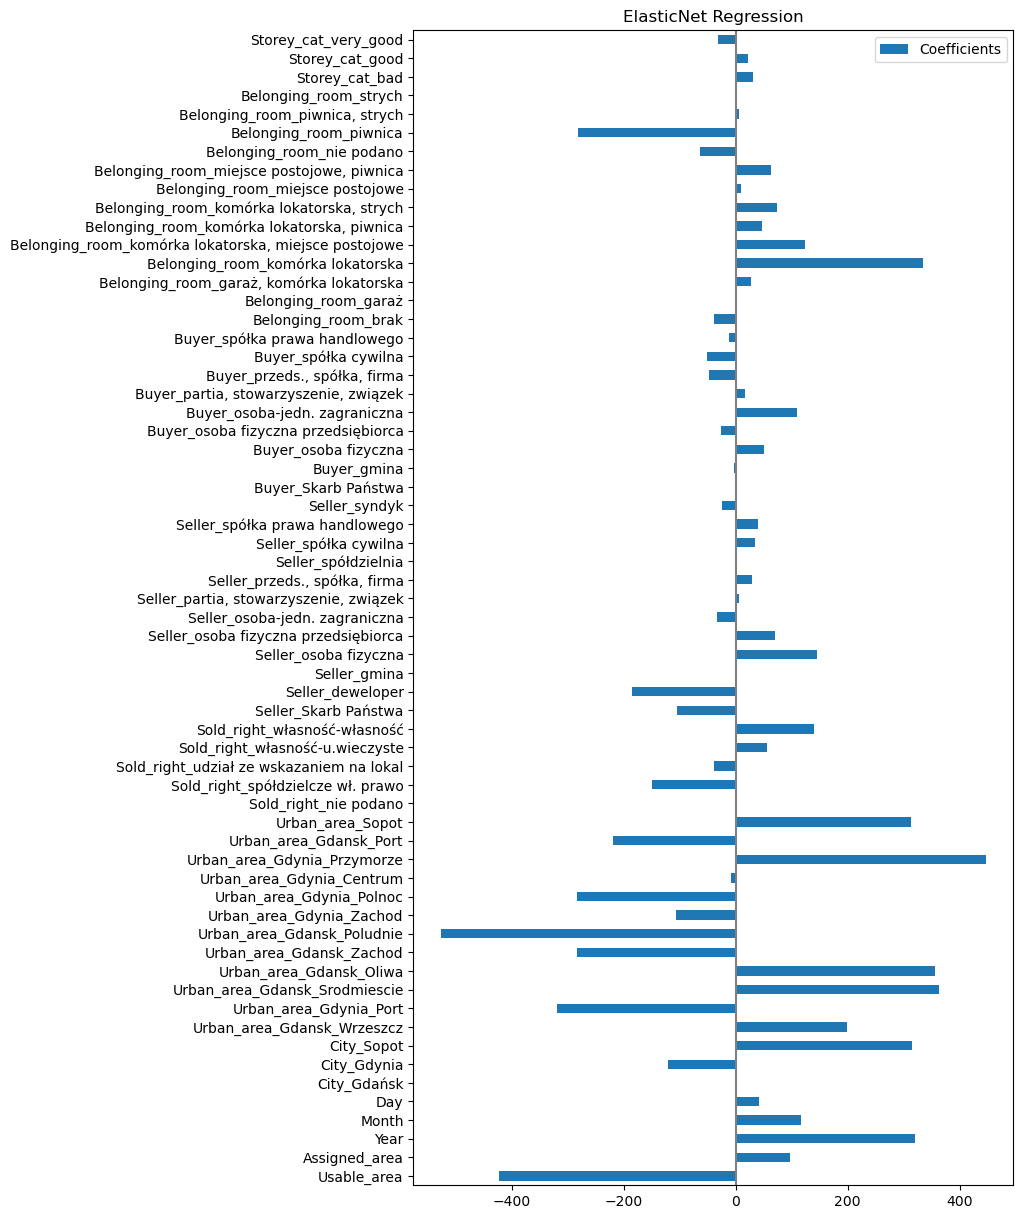

In [209]:
# Feature importance for ElasticNet
coefs = pd.DataFrame(
   elanet.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(10, 15))
plt.title('ElasticNet Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)